In [3]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.stats import zscore
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Activation
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [2]:
todosModelos = []

todosHistoricos = []

In [3]:
def obter_dados_historico(history):
    D = []
    D = [ (a + b + c + d + e + f + g + h + i + j) for a, b, c, d ,e ,f ,g ,h ,i ,j  in zip(history[0].history['val_loss'], history[1].history['val_loss'], history[2].history['val_loss'], history[3].history['val_loss'], history[4].history['val_loss'], history[5].history['val_loss'], history[6].history['val_loss'],history[7].history['val_loss'],history[8].history['val_loss'],history[9].history['val_loss']) ]
    myInt = 10
    val_loss = [float(i) / myInt for i in D ]
    D = []
    D = [ (a + b + c + d + e + f + g + h + i + j) for a, b, c, d ,e ,f ,g ,h ,i ,j  in zip(history[0].history['accuracy'], history[1].history['accuracy'], history[2].history['accuracy'], history[3].history['accuracy'], history[4].history['accuracy'], history[5].history['accuracy'], history[6].history['accuracy'],history[7].history['accuracy'],history[8].history['accuracy'],history[9].history['accuracy']) ]
    myInt = 10
    accuracy = [float(i) / myInt for i in D ]
    D = []
    D = [ (a + b + c + d + e + f + g + h + i + j) for a, b, c, d ,e ,f ,g ,h ,i ,j  in zip(history[0].history['val_accuracy'], history[1].history['val_accuracy'], history[2].history['val_accuracy'], history[3].history['val_accuracy'], history[4].history['val_accuracy'], history[5].history['val_accuracy'], history[6].history['val_accuracy'],history[7].history['val_accuracy'],history[8].history['val_accuracy'],history[9].history['val_accuracy']) ]
    myInt = 10
    val_accuracy = [float(i) / myInt for i in D ]
    
    D = []
    D = [ (a + b + c + d + e + f + g + h + i + j) for a, b, c, d ,e ,f ,g ,h ,i ,j  in zip(history[0].history['loss'], history[1].history['loss'], history[2].history['loss'], history[3].history['loss'], history[4].history['loss'], history[5].history['loss'], history[6].history['val_accuracy'],history[7].history['loss'],history[8].history['loss'],history[9].history['loss']) ]
    myInt = 10
    loss = [float(i) / myInt for i in D ]
    return val_loss, accuracy, val_accuracy, loss

In [4]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label=' Training accuracyValidation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [5]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
import numpy as np
from keras.layers import Flatten
from keras.layers import Dropout
import pandas as pd
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import AveragePooling1D, MaxPooling1D
from keras.utils import to_categorical

def get_model_cnn_1d(x, n_outputs):
    n_timesteps, n_features = x.shape[0], x.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x.shape[1],1)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.stats import zscore
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
def get_model(x):
    model = Sequential()
    model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
    return model

dataset1 = 'dadosComLOG-MESs1pc-547-1892MESs.csv'
dataset2 = 'dadosComLOG-MESs-5pc-2734-8205-MESs.csv'
dataset3 = 'dadosComLOG-MESs10pc-5468-14495MESs.csv'
dataset4 = 'dadosComLOG-MESs10pc-5468-14495MESs.csv'
dataset5 = 'CSVDadosComLog.csv'


In [7]:
def rodar_KFold_cnn(pathfile, kFolds, naotudo):
    dataset = pd.read_csv(pathfile, header=1)
    if naotudo: 
        x = dataset.iloc[:,1:dataset.shape[1]].values
        y = dataset.iloc[:,0].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    else :
        x = dataset.iloc[:,3:dataset.shape[1]].values
        y = dataset.iloc[:,2].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    from keras.layers import Dropout
    # Cross-Validate
    kf = StratifiedKFold(n_splits=kFolds, shuffle=True, random_state=7)
    models = []
    history = []
    acuracias = []
    acuraciaTotal = 0
    fold = 0
    for train, test in kf.split(X_train, y_train):
        fold+=1
        print(f"Fold #{fold}")
        verbose, epochs, batch_size = 0, 200, 20
        xtrain = np.expand_dims(X_train[train], axis=2)
        ytrain = to_categorical(y_train[train] ,2)
        xtest = np.expand_dims(X_train[test], axis=2)
        ytest = to_categorical(y_train[test] ,2)
        n_timesteps, n_features, n_outputs = xtrain.shape[0], xtrain.shape[1], ytrain.shape[1]
        filepath= pathfile+str(fold)+"-val-acc.hdf5"
        acura_save = ModelCheckpoint(filepath ,save_best_only=True, verbose=0, monitor='val_accuracy', mode='max')
        model = get_model_cnn_1d(xtrain, n_outputs)
        history.append(model.fit(xtrain, ytrain, validation_data=(xtest, ytest), 
                                 callbacks= [acura_save],
                                 verbose=verbose, batch_size=batch_size, epochs=epochs))
        
        model.load_weights(filepath)
        models.append(model)
        _, accuracy = model.evaluate(xtest, ytest, verbose = 0)
        acuraciaTotal = acuraciaTotal + accuracy
        print('Accuracy: %.2f' % (accuracy*100))
        acuracias.append(accuracy)
        #_, accuracy = model.evaluate(X_test, y_test, verbose = 0)
        #print('AccuracyTest: %.2f' % (accuracy*100))
    acuraciaTotal = acuraciaTotal / kFolds
    print(f"Acuracia media de todos os K folds: {acuraciaTotal}")

    # Plotar grafico de cada fold

    for historico in history:
        plot_history(historico)
        
    import matplotlib.pyplot as plt
    plt.plot(acuracias)
    plt.xlabel('Fold')
    plt.ylabel('Acuracia')
    plt.title("Acuracia por Fold")
    plt.show()
        
    return models, history

In [8]:
def rodar_KFold(pathfile, kFolds, naotudo):
    dataset = pd.read_csv(pathfile, header=1)
    if naotudo: 
        x = dataset.iloc[:,1:dataset.shape[1]].values
        y = dataset.iloc[:,0].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    else :
        x = dataset.iloc[:,3:dataset.shape[1]].values
        y = dataset.iloc[:,2].values
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    from keras.layers import Dropout
    # Cross-Validate
    kf = StratifiedKFold(n_splits=kFolds, shuffle=True, random_state=7)
    models = []
    history = []
    acuracias = []
    acuraciaTotal = 0
    fold = 0
    for train, test in kf.split(X_train, y_train):
        fold+=1
        print(f"Fold #{fold}")
        filepath= pathfile+str(fold)+"-val-acc.hdf5"
        acura_save = ModelCheckpoint(filepath ,save_best_only=True, verbose=0, monitor='val_accuracy', mode='max')
        model = get_model(x)
        history.append(model.fit(X_train[train], y_train[train], validation_data=(X_train[test], y_train[test]), 
                                 callbacks= [acura_save],
                                 verbose=0, batch_size=30, epochs=200))
        model.load_weights(filepath)
        models.append(model)
        _, accuracy = model.evaluate(X_train[test], y_train[test], verbose = 0)
        acuraciaTotal = acuraciaTotal + accuracy
        print('Accuracy: %.2f' % (accuracy*100))
        acuracias.append(accuracy)
        _, accuracy = model.evaluate(X_test, y_test, verbose = 0)
        print('AccuracyTest: %.2f' % (accuracy*100))
    acuraciaTotal = acuraciaTotal / kFolds
    print(f"Acuracia media de todos os K folds: {acuraciaTotal}")

    # Plotar grafico de cada fold

    for historico in history:
        plot_history(historico)
        
        
    import matplotlib.pyplot as plt
    plt.plot(acuracias)
    plt.xlabel('Fold')
    plt.ylabel('Acuracia')
    plt.title("Acuracia por Fold")
    plt.show()
        
    return models, history

Fold #1
Accuracy: 65.00
AccuracyTest: 48.78
Fold #2
Accuracy: 75.00
AccuracyTest: 54.88
Fold #3
Accuracy: 63.16
AccuracyTest: 62.20
Fold #4
Accuracy: 78.95
AccuracyTest: 62.20
Fold #5
Accuracy: 84.21
AccuracyTest: 59.76
Fold #6
Accuracy: 57.89
AccuracyTest: 57.32
Fold #7
Accuracy: 68.42
AccuracyTest: 58.54
Fold #8
Accuracy: 66.67
AccuracyTest: 53.66
Fold #9
Accuracy: 88.89
AccuracyTest: 64.63
Fold #10
Accuracy: 77.78
AccuracyTest: 45.12
Acuracia media de todos os K folds: 0.7259649157524108


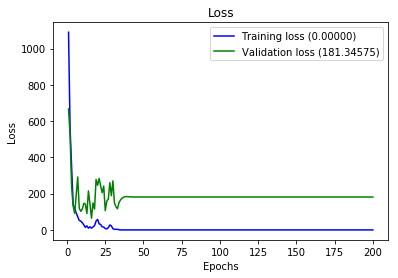

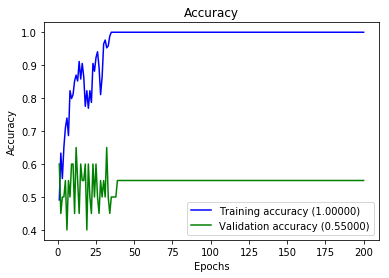

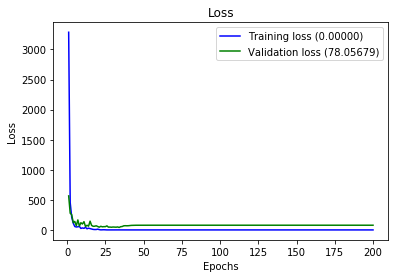

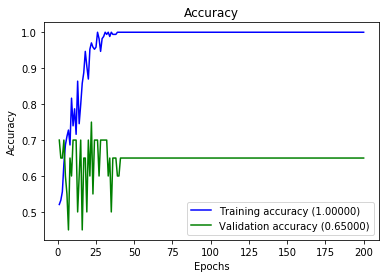

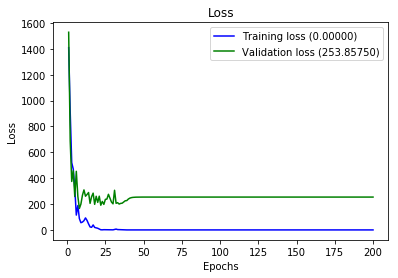

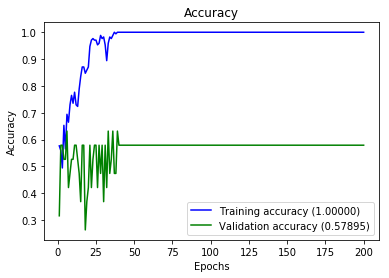

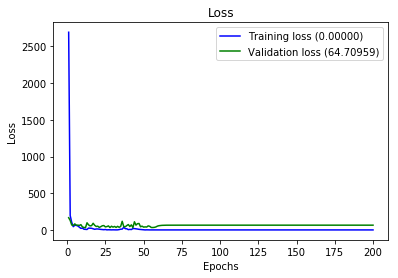

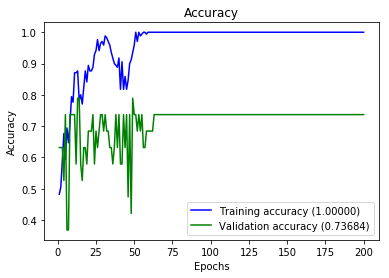

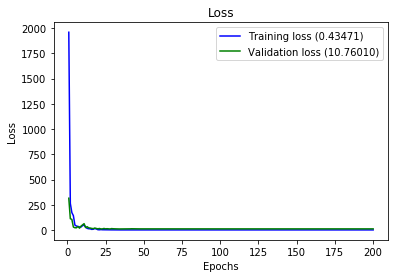

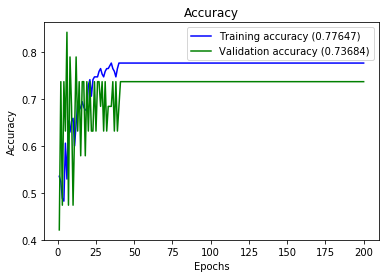

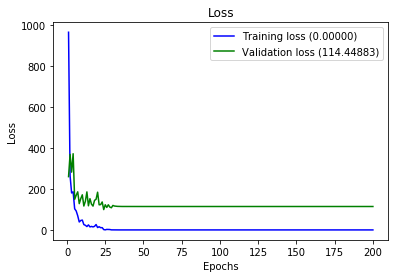

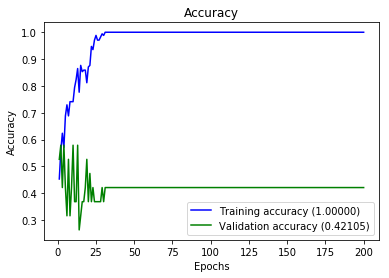

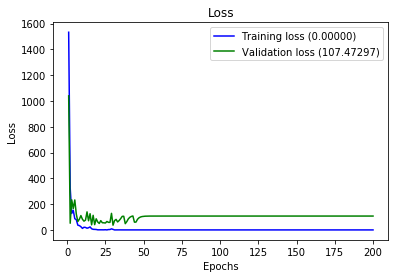

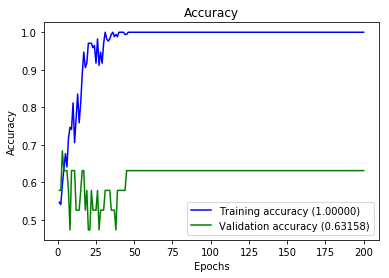

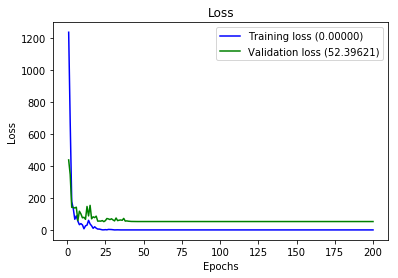

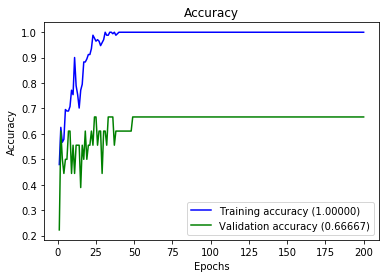

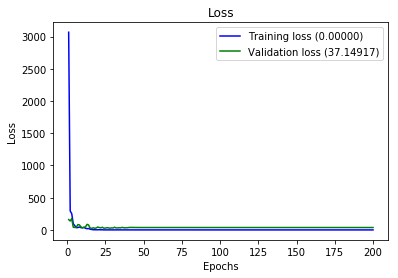

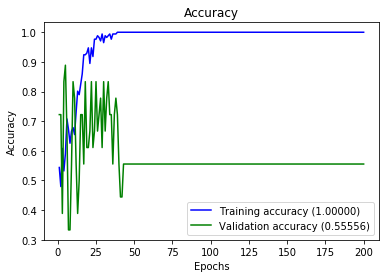

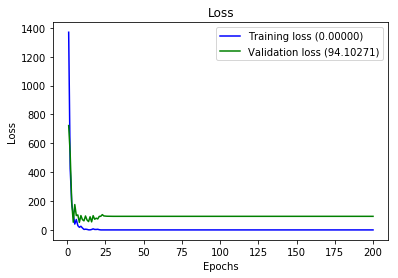

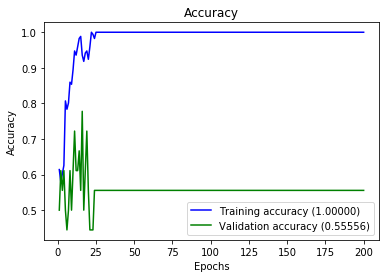

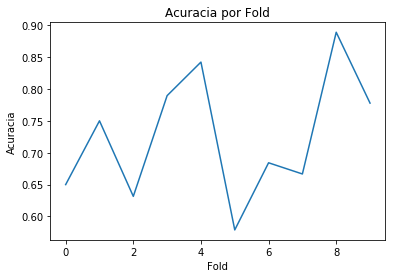

In [9]:
models, history = rodar_KFold(dataset1, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 75.00
AccuracyTest: 62.20
Fold #2
Accuracy: 68.42
AccuracyTest: 65.85
Fold #3
Accuracy: 84.21
AccuracyTest: 54.88
Fold #4
Accuracy: 73.68
AccuracyTest: 54.88
Fold #5
Accuracy: 73.68
AccuracyTest: 54.88
Fold #6
Accuracy: 73.68
AccuracyTest: 51.22
Fold #7
Accuracy: 73.68
AccuracyTest: 64.63
Fold #8
Accuracy: 73.68
AccuracyTest: 57.32
Fold #9
Accuracy: 72.22
AccuracyTest: 60.98
Fold #10
Accuracy: 72.22
AccuracyTest: 53.66
Acuracia media de todos os K folds: 0.7404970705509186


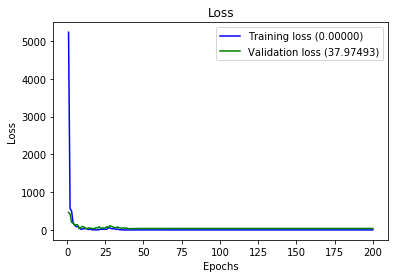

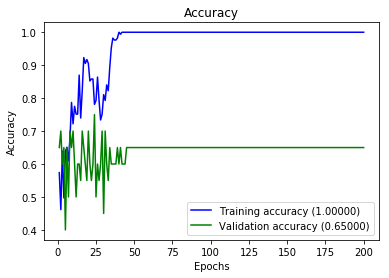

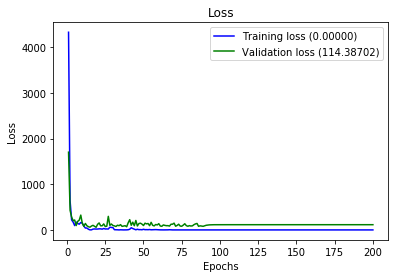

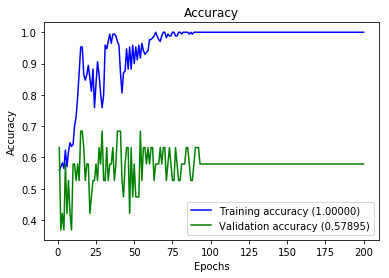

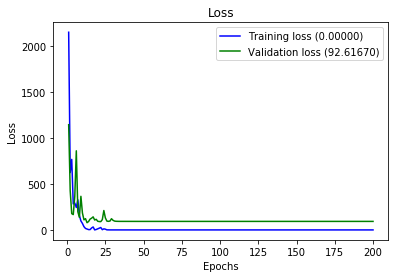

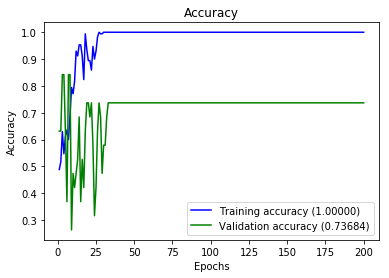

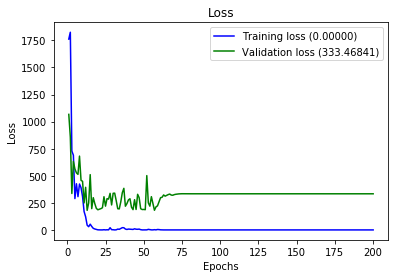

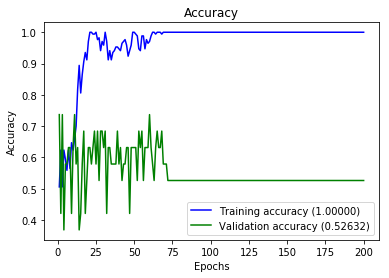

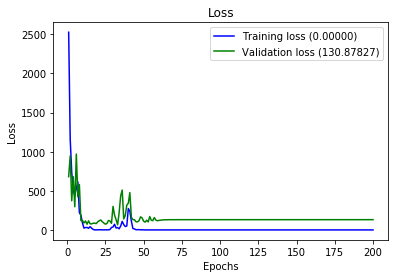

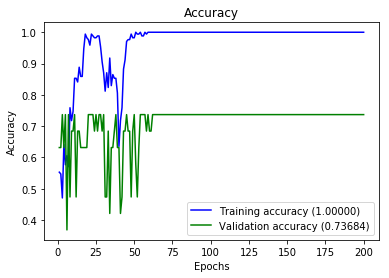

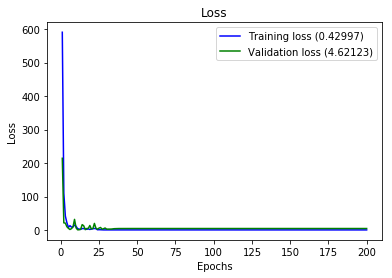

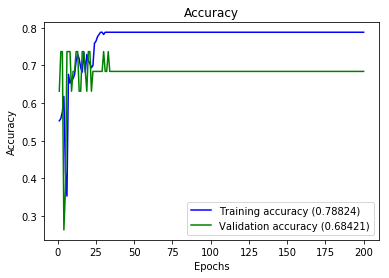

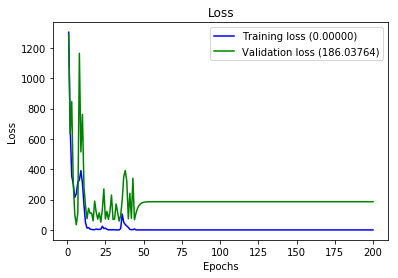

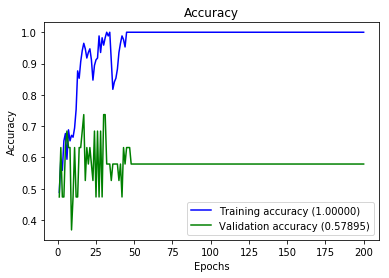

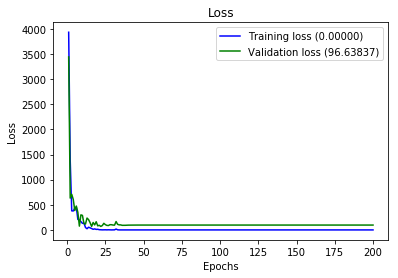

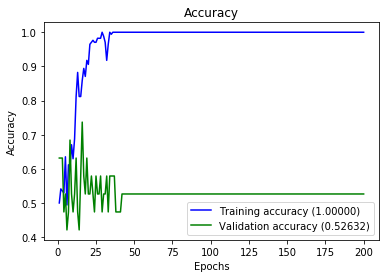

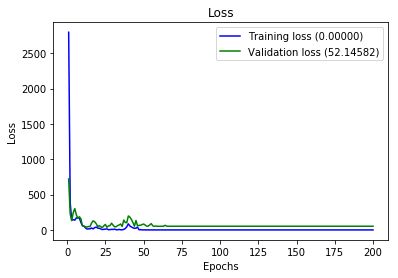

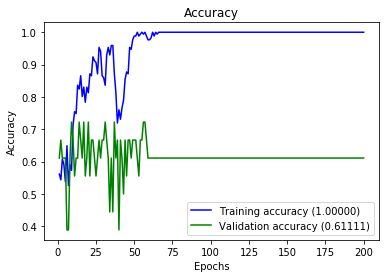

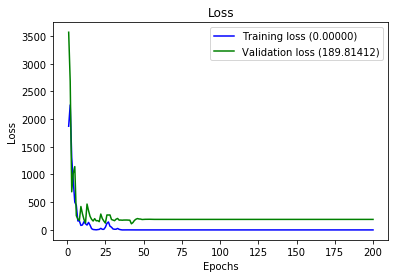

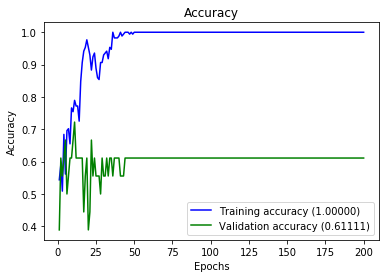

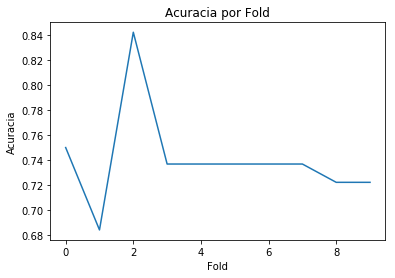

In [10]:
models, history = rodar_KFold(dataset2, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 90.00
AccuracyTest: 59.76
Fold #2
Accuracy: 75.00
AccuracyTest: 68.29
Fold #3
Accuracy: 68.42
AccuracyTest: 58.54
Fold #4
Accuracy: 84.21
AccuracyTest: 71.95
Fold #5
Accuracy: 68.42
AccuracyTest: 52.44
Fold #6
Accuracy: 73.68
AccuracyTest: 65.85
Fold #7
Accuracy: 84.21
AccuracyTest: 65.85
Fold #8
Accuracy: 66.67
AccuracyTest: 57.32
Fold #9
Accuracy: 88.89
AccuracyTest: 67.07
Fold #10
Accuracy: 77.78
AccuracyTest: 65.85
Acuracia media de todos os K folds: 0.7772807061672211


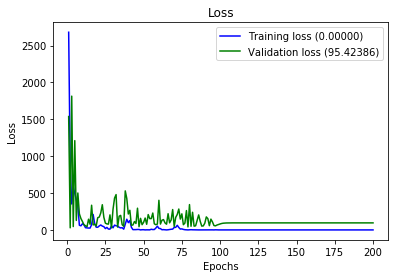

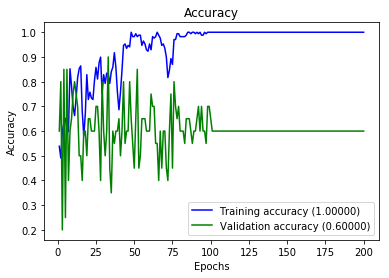

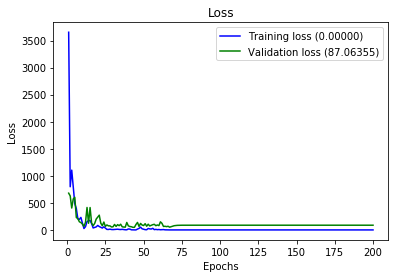

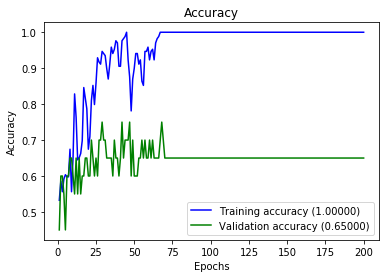

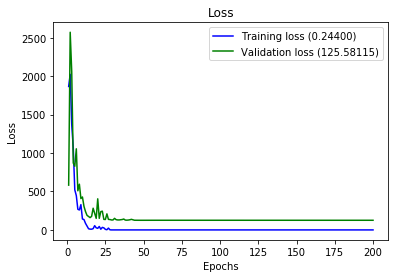

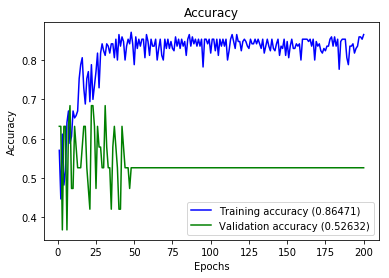

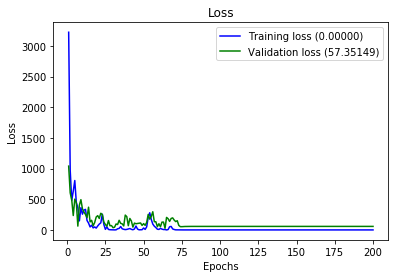

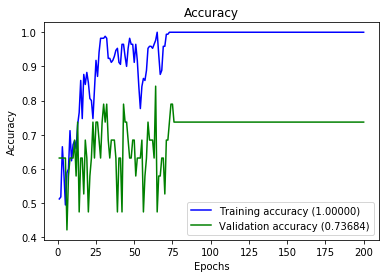

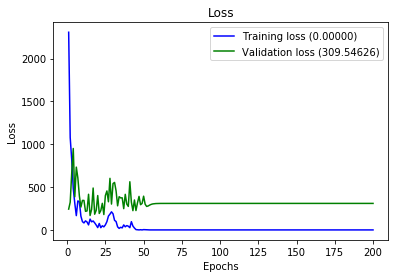

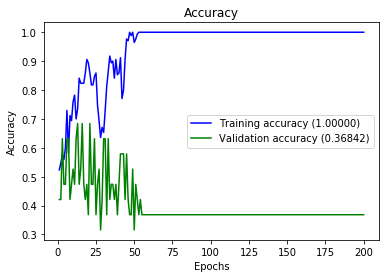

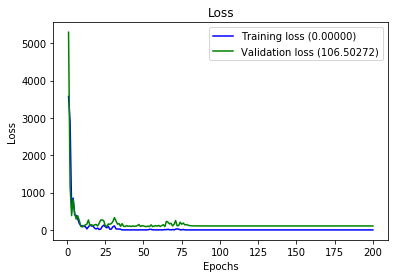

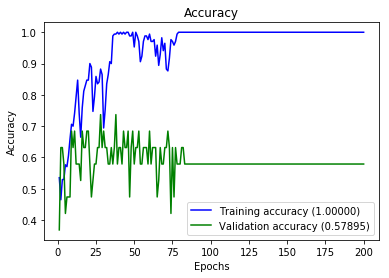

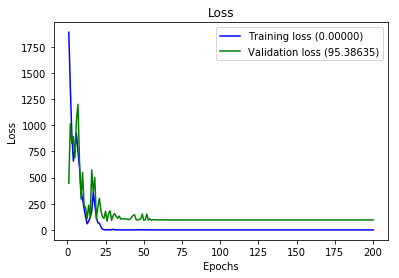

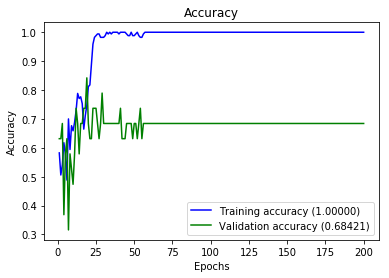

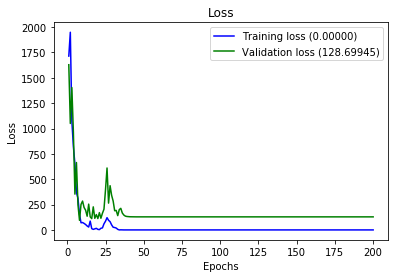

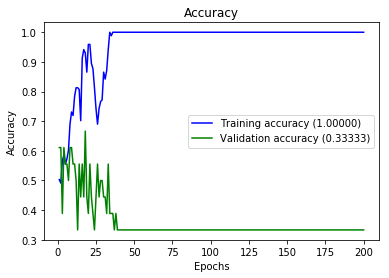

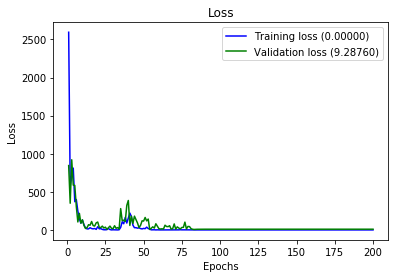

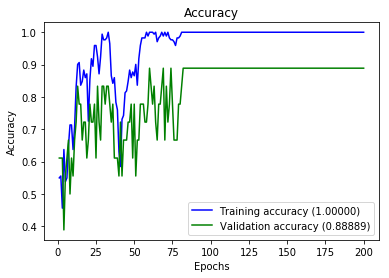

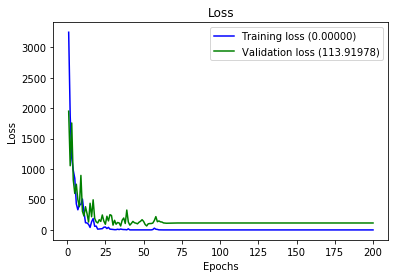

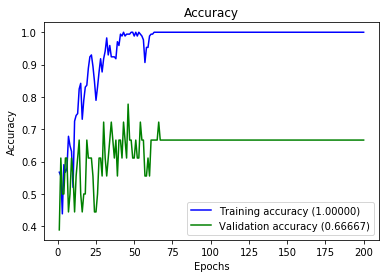

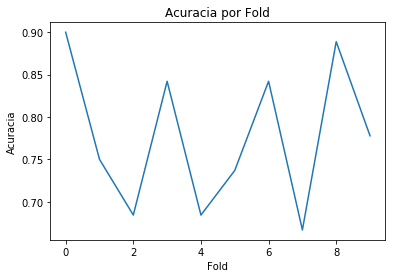

In [11]:
models, history = rodar_KFold(dataset3, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 80.00
AccuracyTest: 54.88
Fold #2
Accuracy: 70.00
AccuracyTest: 57.32
Fold #3
Accuracy: 70.00
AccuracyTest: 54.88
Fold #4
Accuracy: 73.68
AccuracyTest: 53.66
Fold #5
Accuracy: 84.21
AccuracyTest: 52.44
Fold #6
Accuracy: 84.21
AccuracyTest: 62.20
Fold #7
Accuracy: 72.22
AccuracyTest: 54.88
Fold #8
Accuracy: 77.78
AccuracyTest: 60.98
Fold #9
Accuracy: 72.22
AccuracyTest: 54.88
Fold #10
Accuracy: 66.67
AccuracyTest: 51.22
Acuracia media de todos os K folds: 0.7509941518306732


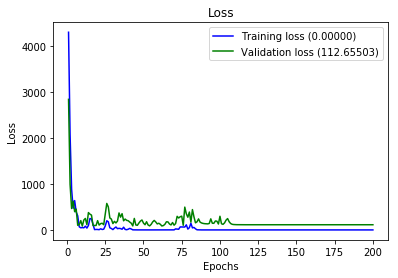

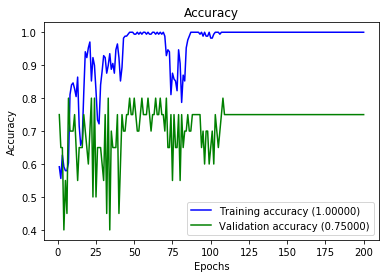

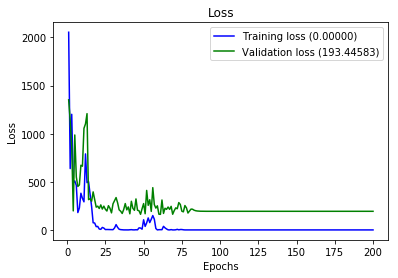

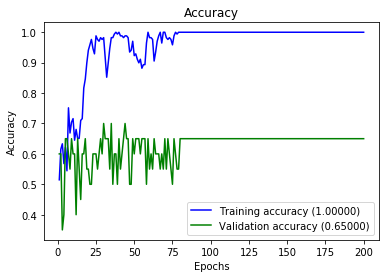

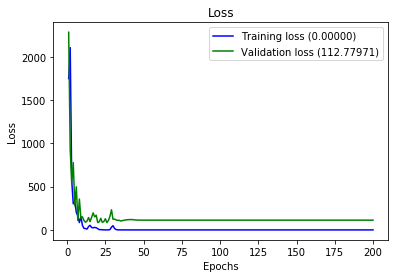

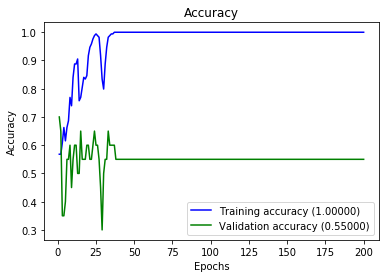

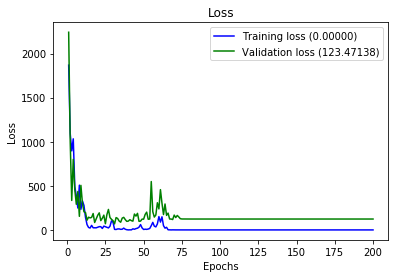

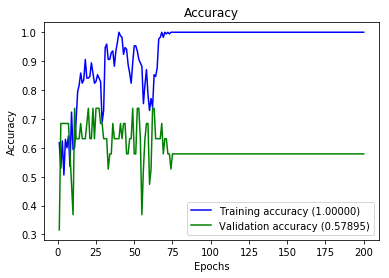

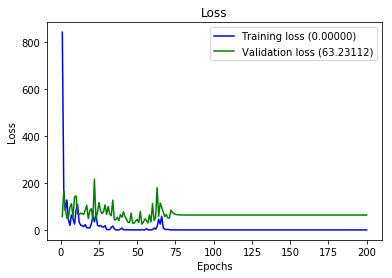

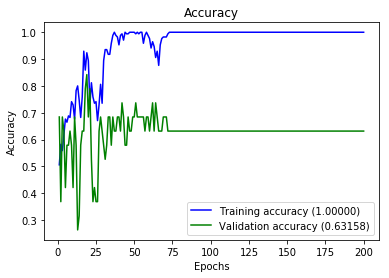

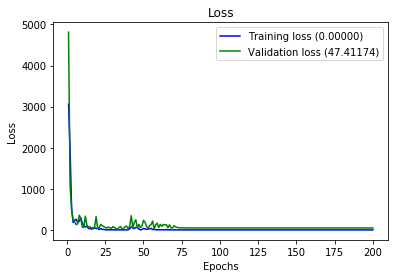

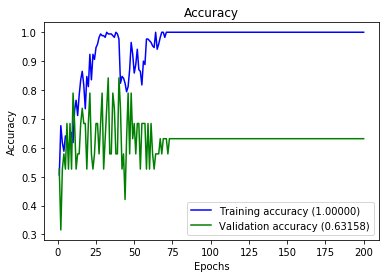

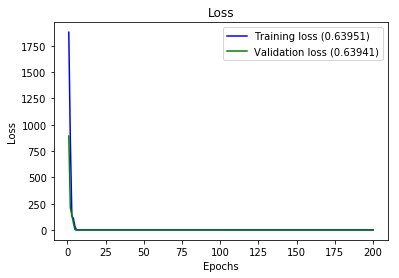

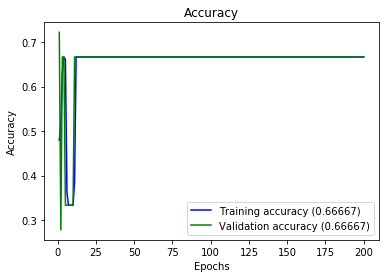

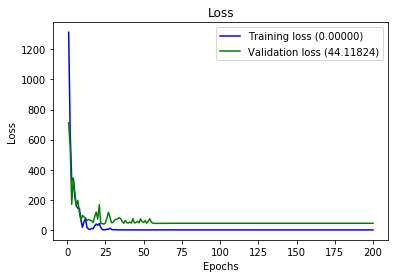

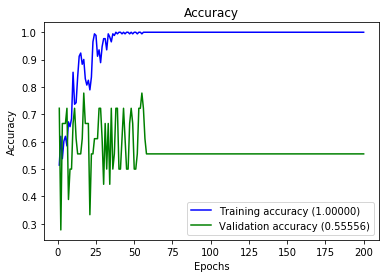

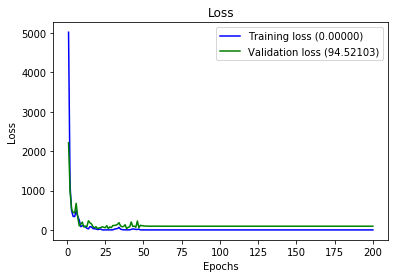

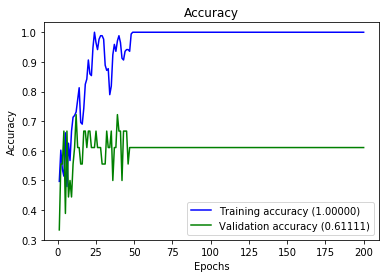

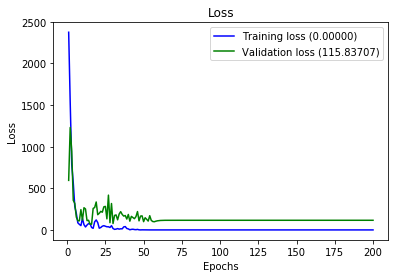

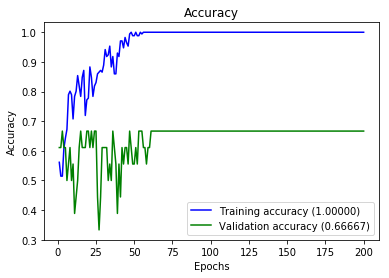

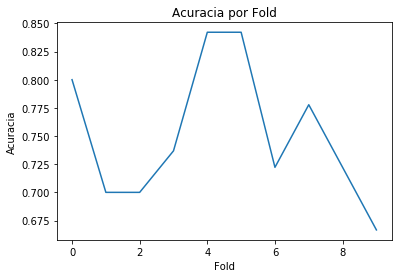

In [12]:
models, history = rodar_KFold(dataset4, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 66.67
AccuracyTest: 65.56
Fold #2
Accuracy: 76.19
AccuracyTest: 71.11
Fold #3
Accuracy: 61.90
AccuracyTest: 57.78
Fold #4
Accuracy: 66.67
AccuracyTest: 61.11
Fold #5
Accuracy: 61.90
AccuracyTest: 57.78
Fold #6
Accuracy: 61.90
AccuracyTest: 57.78
Fold #7
Accuracy: 61.90
AccuracyTest: 57.78
Fold #8
Accuracy: 66.67
AccuracyTest: 55.56
Fold #9
Accuracy: 66.67
AccuracyTest: 63.33
Fold #10
Accuracy: 75.00
AccuracyTest: 71.11
Acuracia media de todos os K folds: 0.6654762089252472


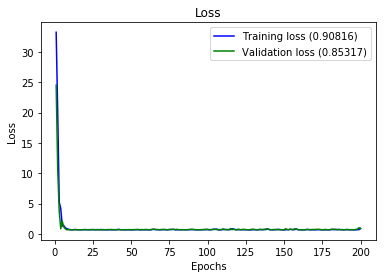

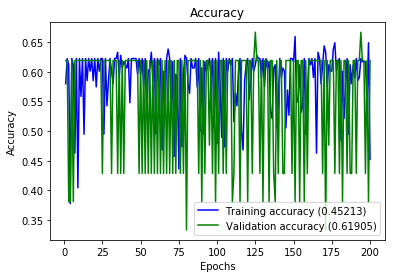

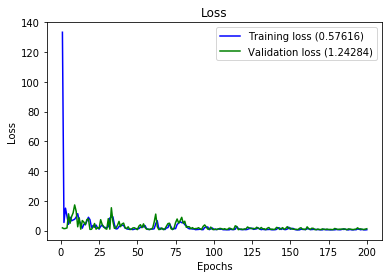

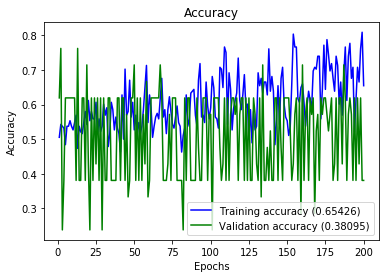

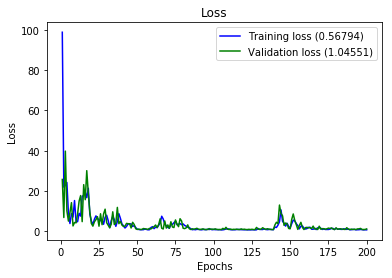

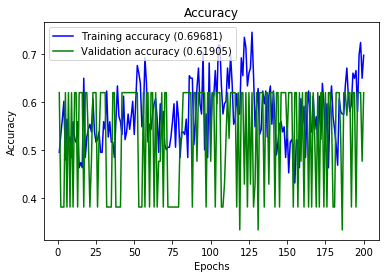

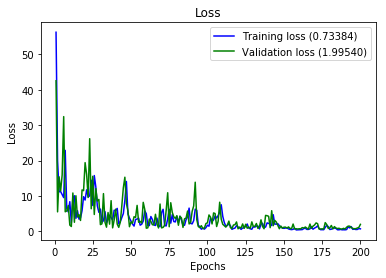

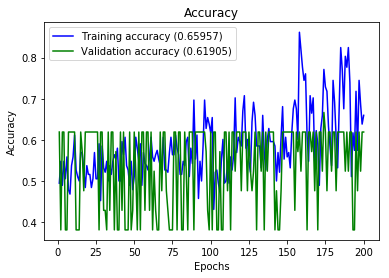

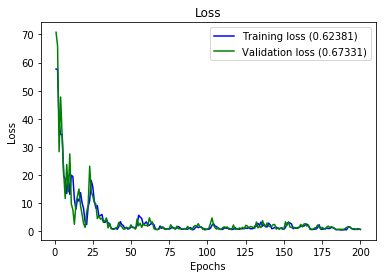

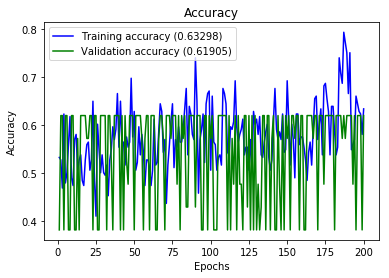

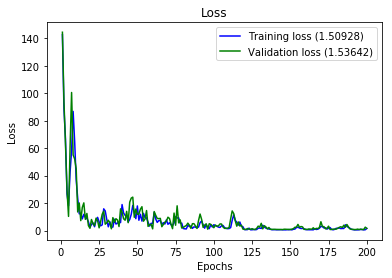

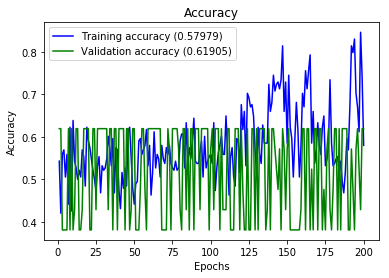

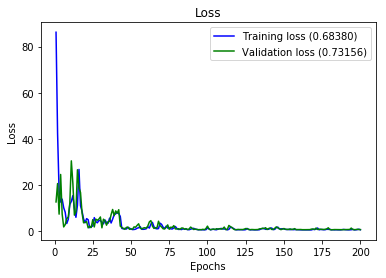

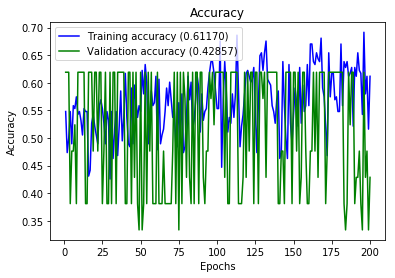

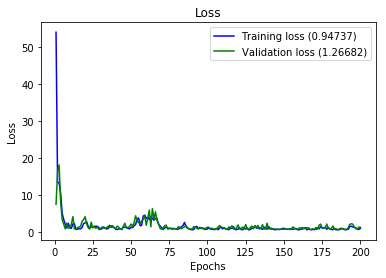

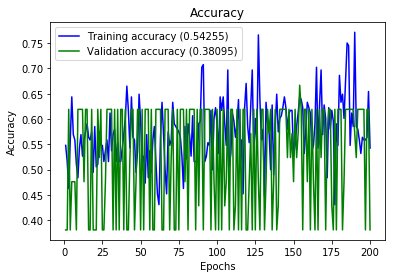

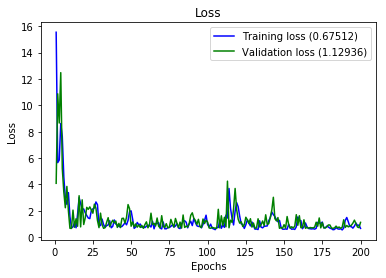

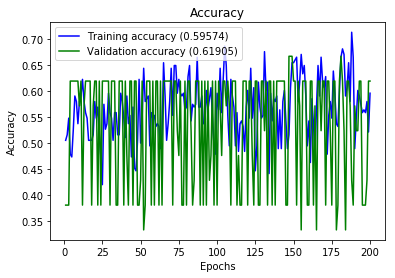

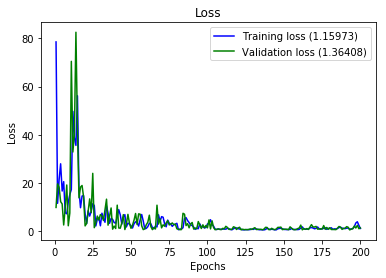

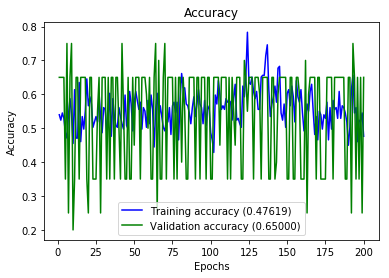

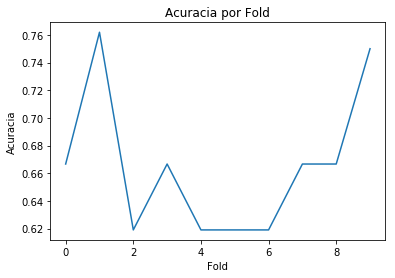

In [13]:
models, history = rodar_KFold(dataset5, 10, 0)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 80.00
Fold #2
Accuracy: 70.00
Fold #3
Accuracy: 78.95
Fold #4
Accuracy: 68.42
Fold #5
Accuracy: 73.68
Fold #6
Accuracy: 78.95
Fold #7
Accuracy: 84.21
Fold #8
Accuracy: 77.78
Fold #9
Accuracy: 66.67
Fold #10
Accuracy: 94.44
Acuracia media de todos os K folds: 0.773099422454834


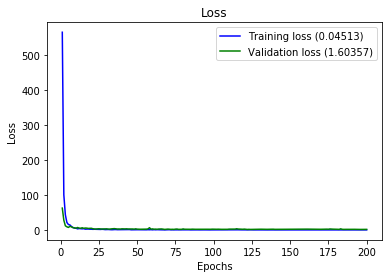

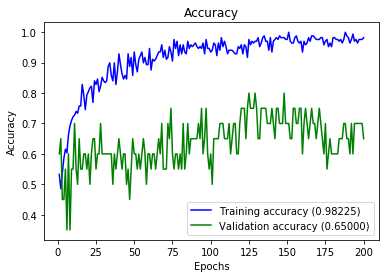

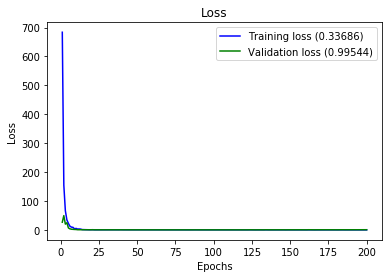

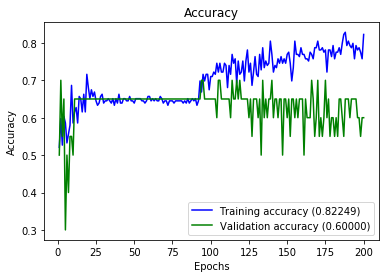

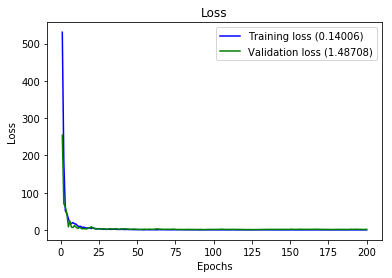

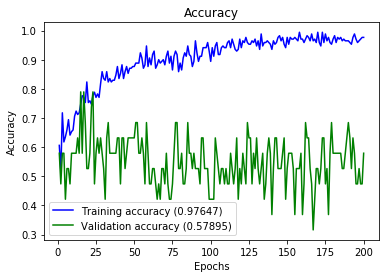

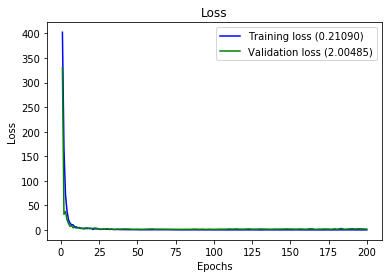

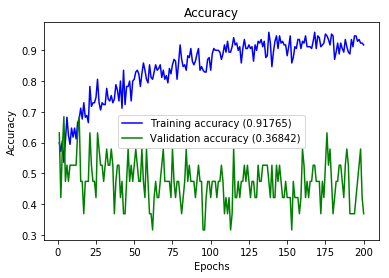

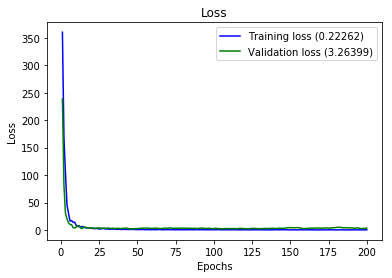

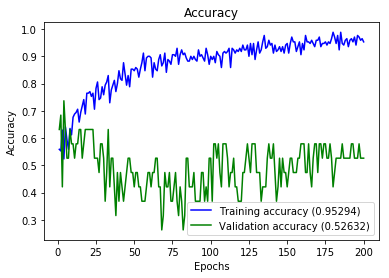

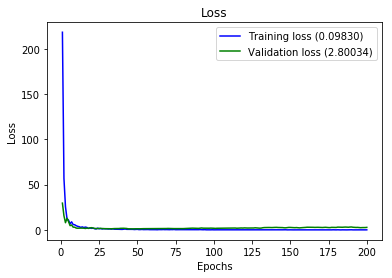

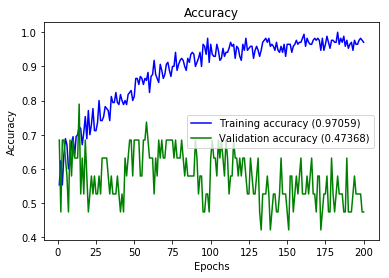

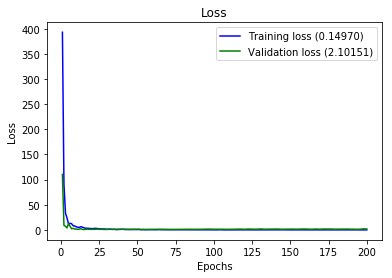

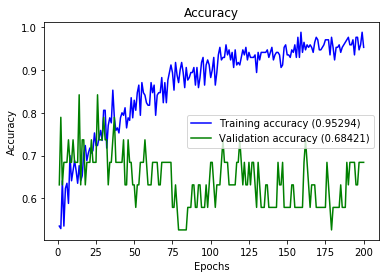

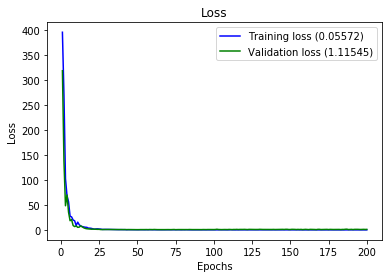

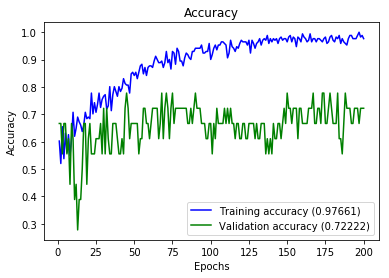

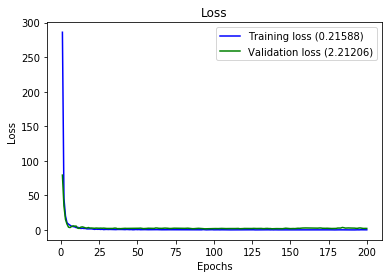

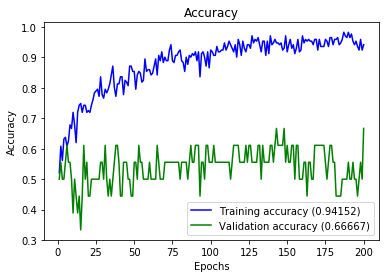

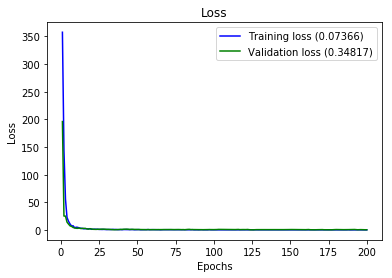

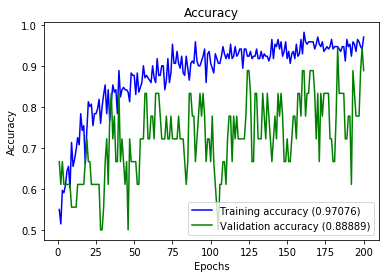

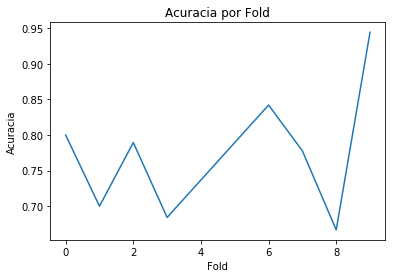

In [14]:
models, history = rodar_KFold_cnn(dataset1, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 85.00
Fold #2
Accuracy: 84.21
Fold #3
Accuracy: 84.21
Fold #4
Accuracy: 68.42
Fold #5
Accuracy: 68.42
Fold #6
Accuracy: 84.21
Fold #7
Accuracy: 78.95
Fold #8
Accuracy: 73.68
Fold #9
Accuracy: 61.11
Fold #10
Accuracy: 72.22
Acuracia media de todos os K folds: 0.7604386031627655


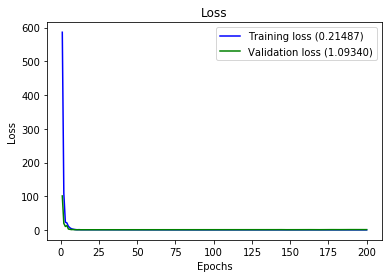

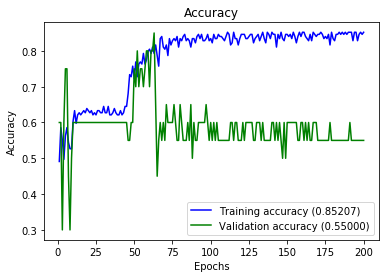

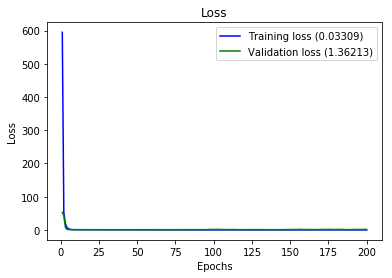

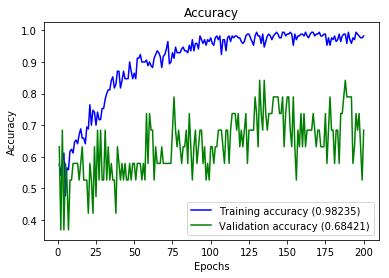

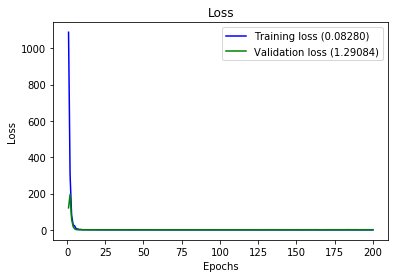

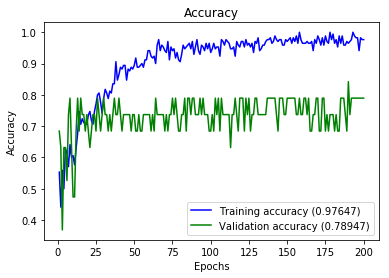

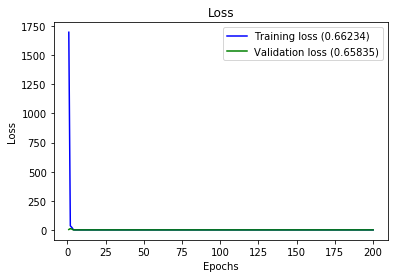

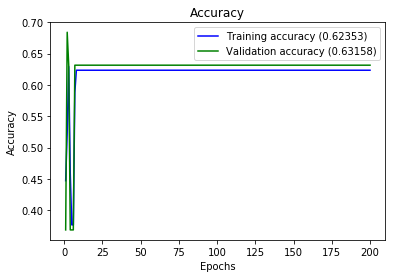

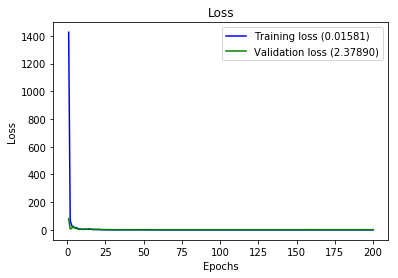

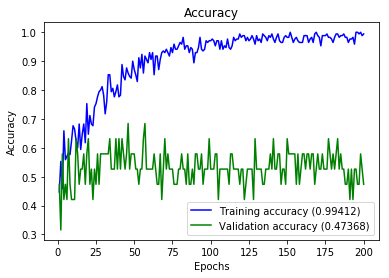

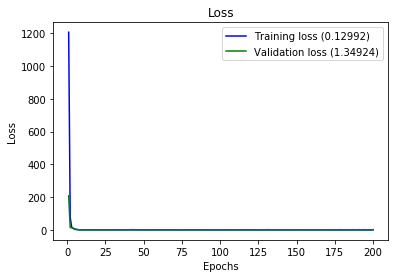

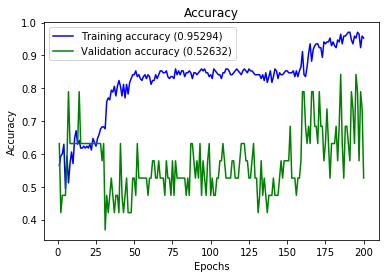

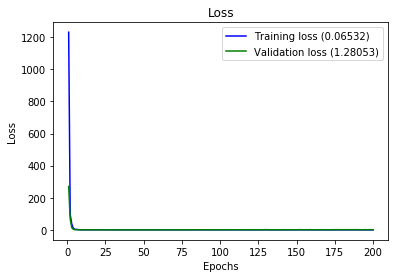

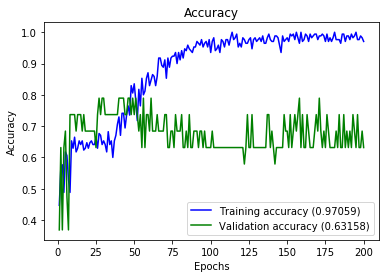

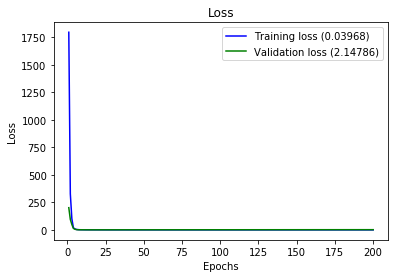

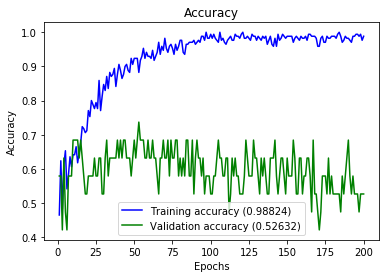

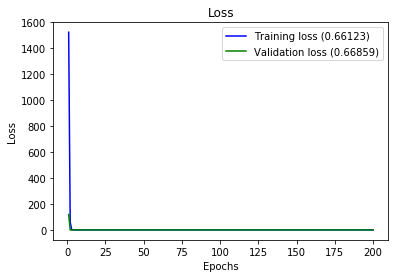

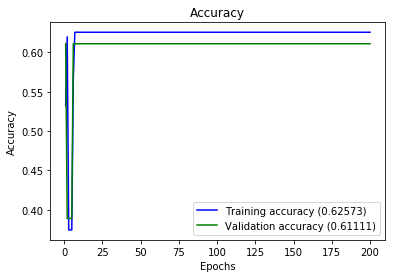

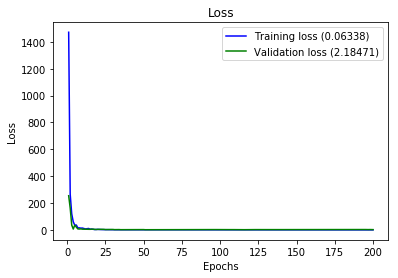

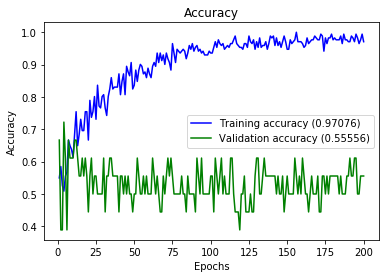

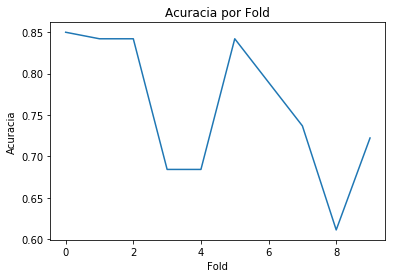

In [15]:
models, history = rodar_KFold_cnn(dataset2, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 78.95
Fold #2
Accuracy: 63.16
Fold #3
Accuracy: 78.95
Fold #4
Accuracy: 68.42
Fold #5
Accuracy: 89.47
Fold #6
Accuracy: 89.47
Fold #7
Accuracy: 68.42
Fold #8
Accuracy: 89.47
Fold #9
Accuracy: 68.42
Fold #10
Accuracy: 77.78
Acuracia media de todos os K folds: 0.7725146234035491


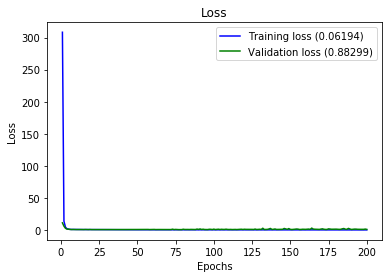

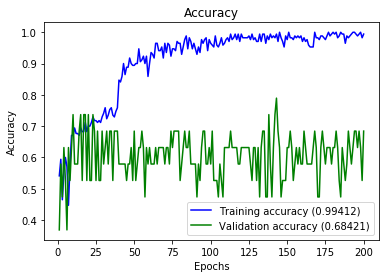

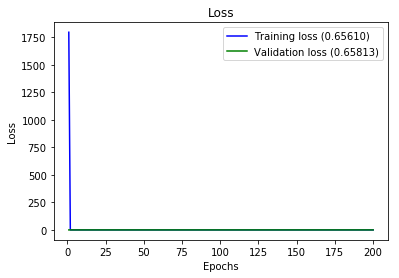

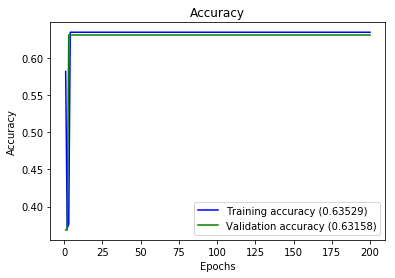

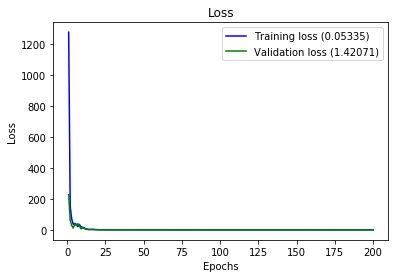

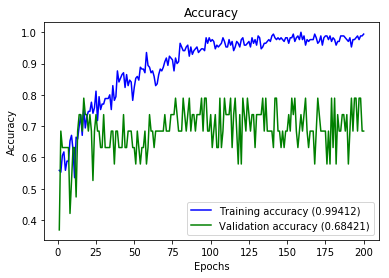

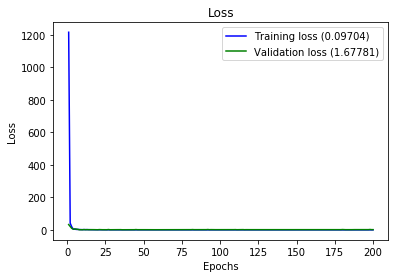

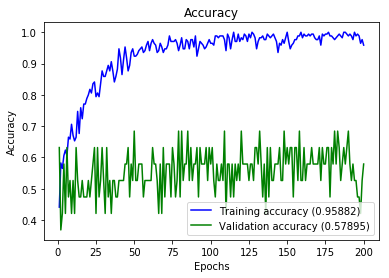

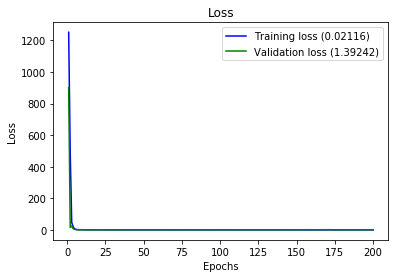

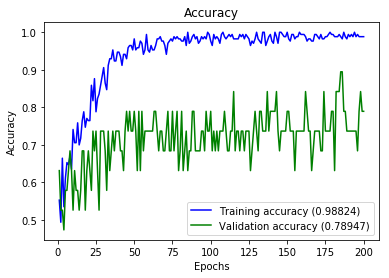

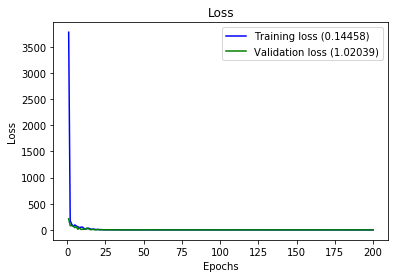

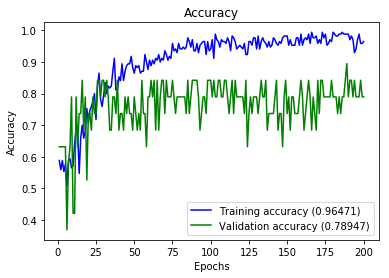

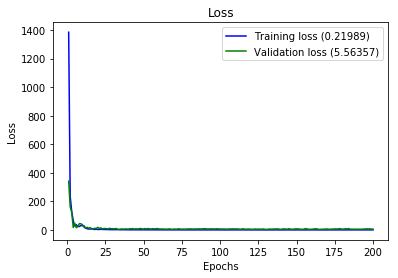

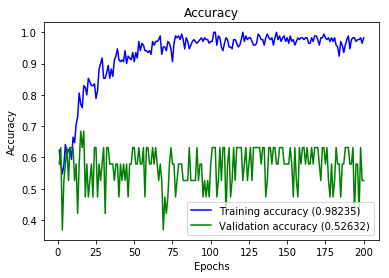

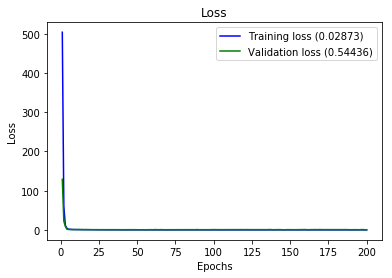

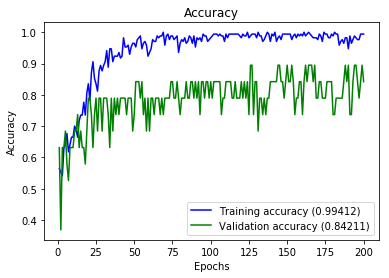

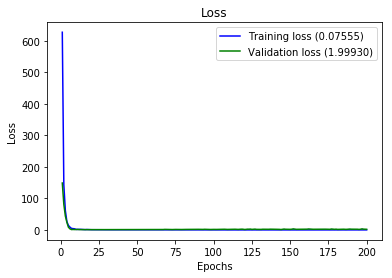

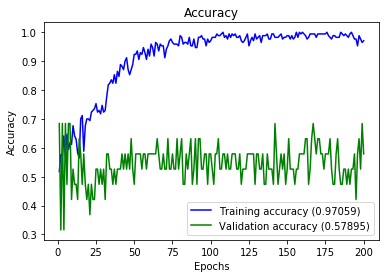

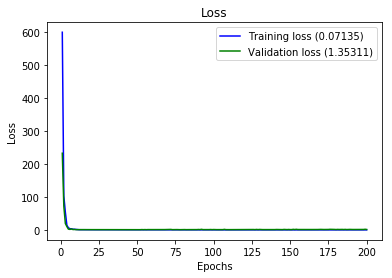

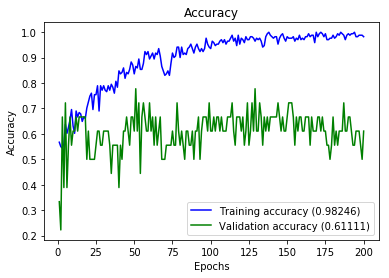

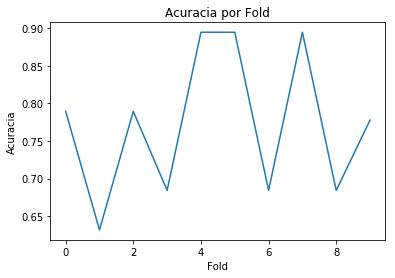

In [16]:
models, history = rodar_KFold_cnn(dataset3, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 90.00
Fold #2
Accuracy: 85.00
Fold #3
Accuracy: 70.00
Fold #4
Accuracy: 80.00
Fold #5
Accuracy: 84.21
Fold #6
Accuracy: 88.89
Fold #7
Accuracy: 77.78
Fold #8
Accuracy: 77.78
Fold #9
Accuracy: 77.78
Fold #10
Accuracy: 83.33
Acuracia media de todos os K folds: 0.8147660851478576


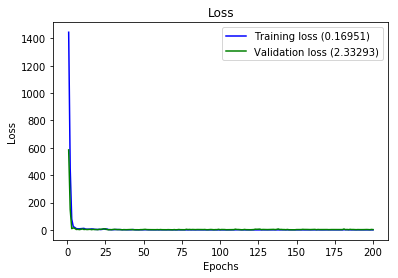

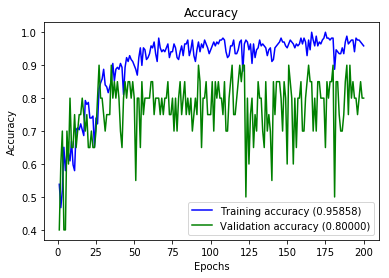

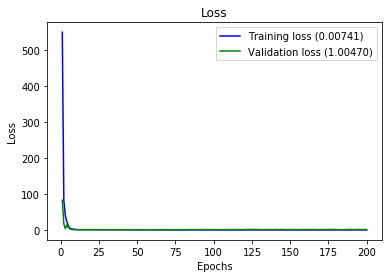

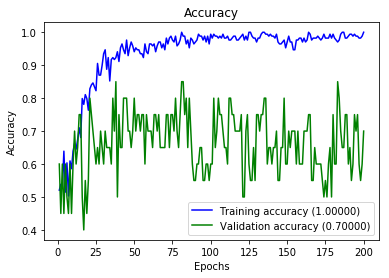

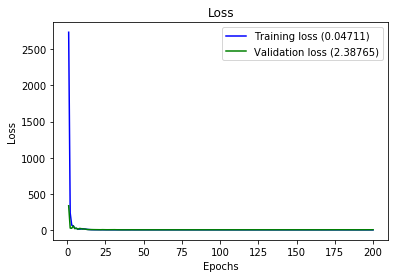

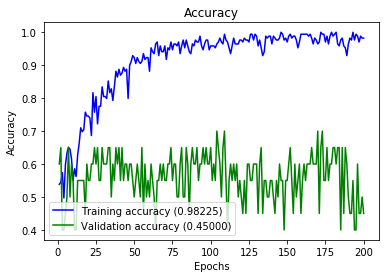

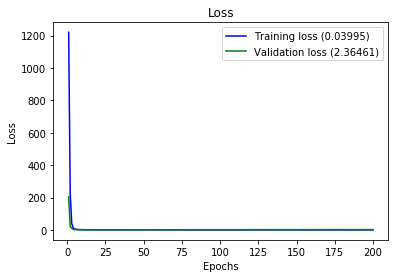

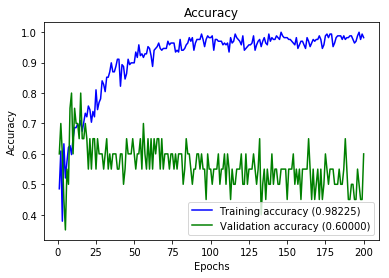

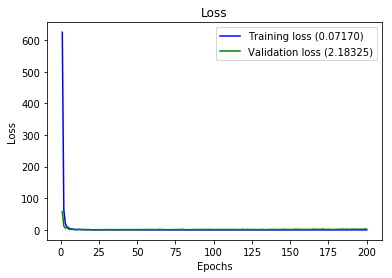

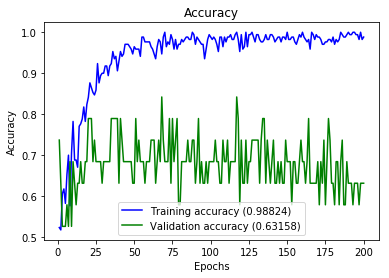

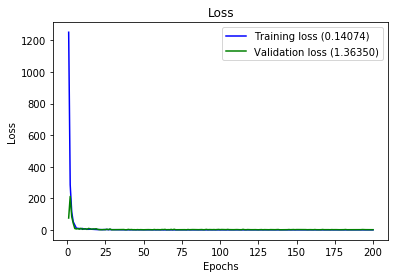

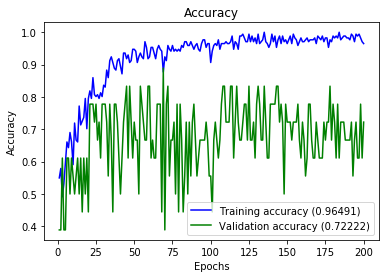

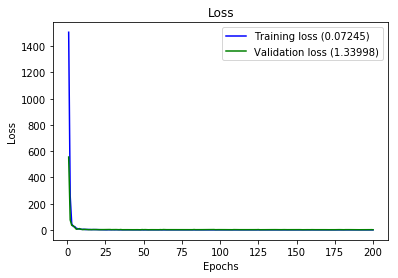

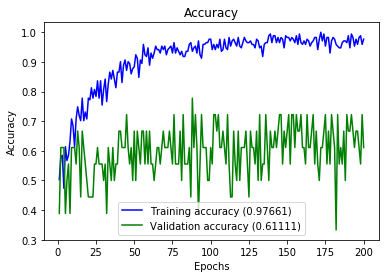

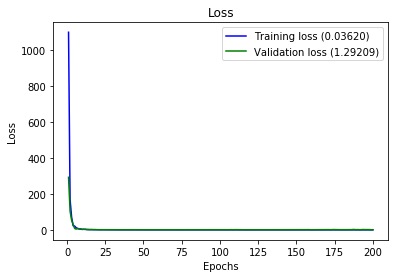

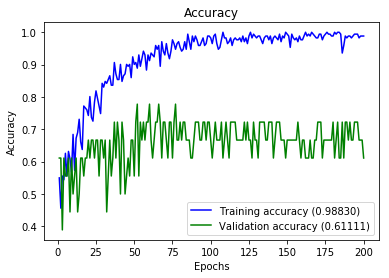

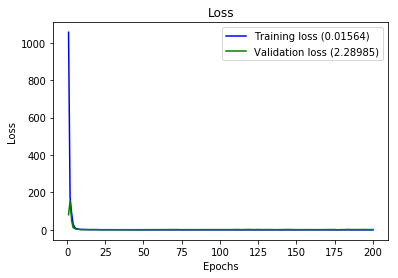

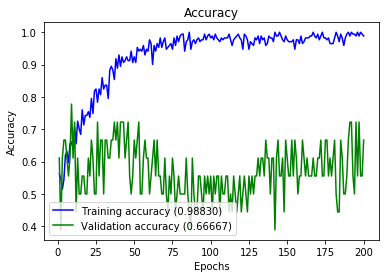

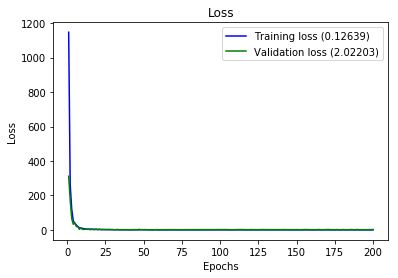

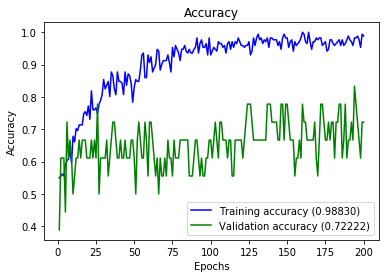

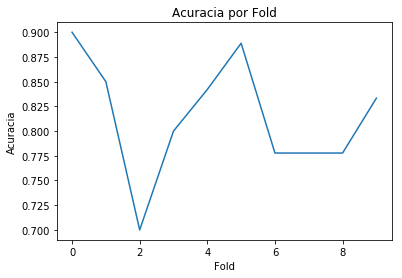

In [17]:
models, history = rodar_KFold_cnn(dataset4, 10, 1)
todosModelos.append(models)
todosHistoricos.append(history)

Fold #1
Accuracy: 68.18
Fold #2
Accuracy: 68.18
Fold #3
Accuracy: 77.27
Fold #4
Accuracy: 77.27
Fold #5
Accuracy: 71.43
Fold #6
Accuracy: 75.00
Fold #7
Accuracy: 60.00
Fold #8
Accuracy: 75.00
Fold #9
Accuracy: 90.00
Fold #10
Accuracy: 75.00
Acuracia media de todos os K folds: 0.7373376607894897


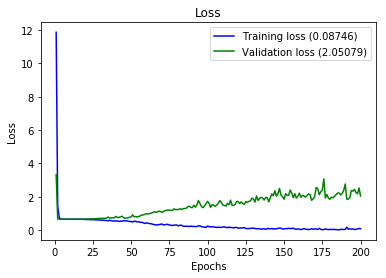

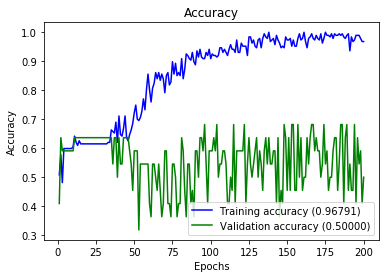

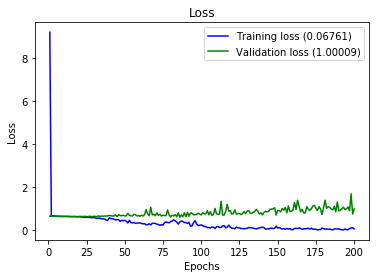

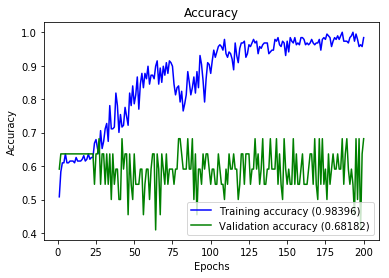

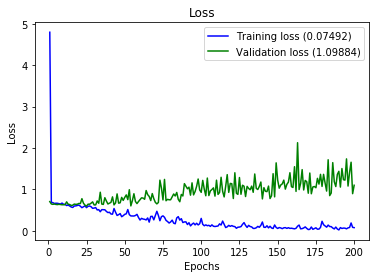

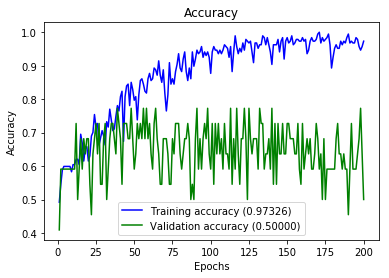

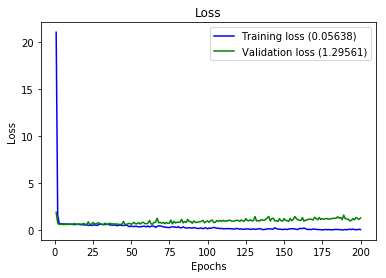

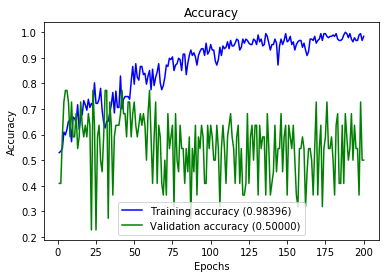

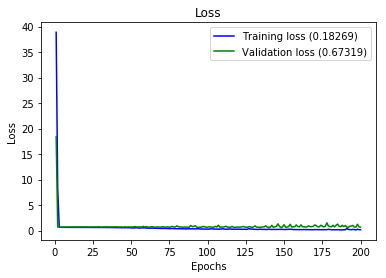

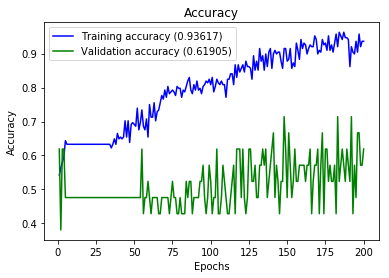

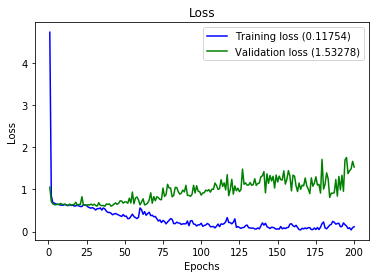

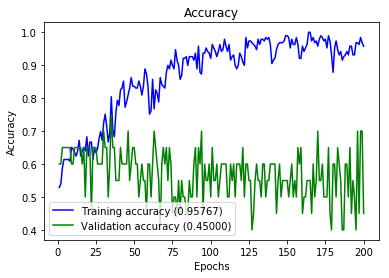

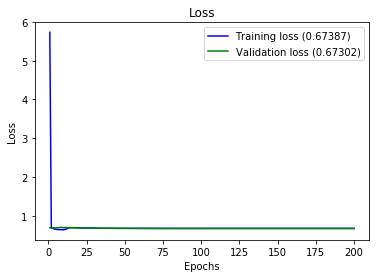

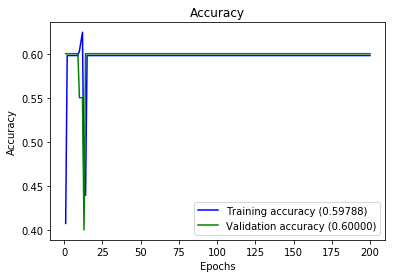

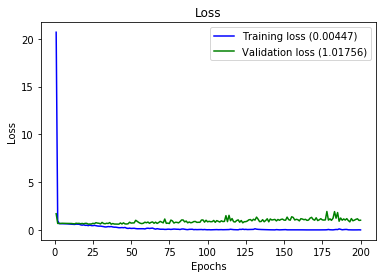

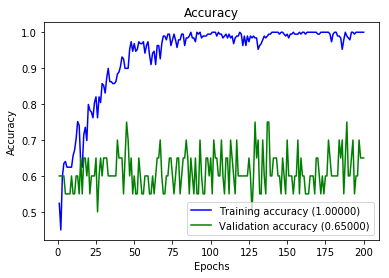

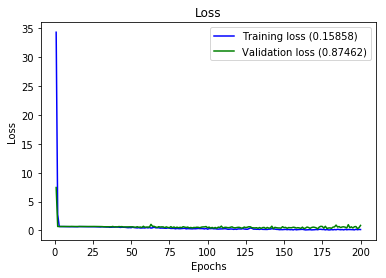

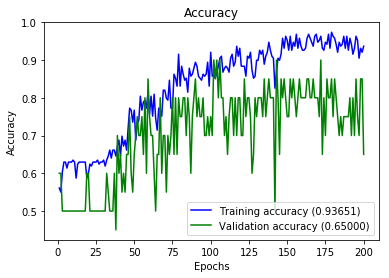

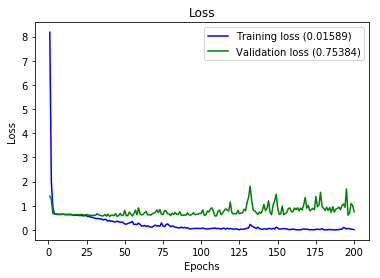

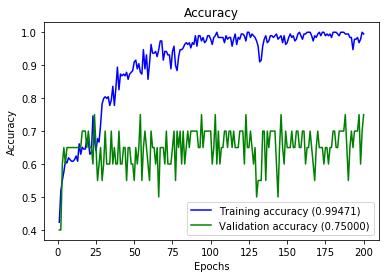

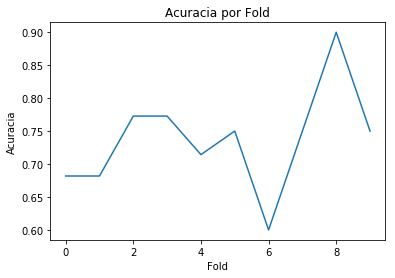

In [18]:
models, history = rodar_KFold_cnn(dataset5, 10, 0)
todosModelos.append(models)
todosHistoricos.append(history)

In [19]:
todosHistoricos[0]

In [30]:
todosHistoricos[5][0]

In [84]:
val_loss, accuracy, val_accuracy, loss = obter_dados_historico(todosHistoricos[4])

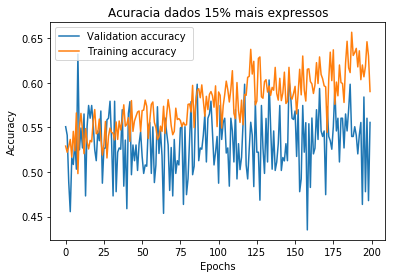

In [85]:
plt.figure(1)
plt.plot(val_accuracy, label ="Validation accuracy ")
plt.plot(accuracy, label ="Training accuracy")
plt.title('Acuracia dados 15% mais expressos')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

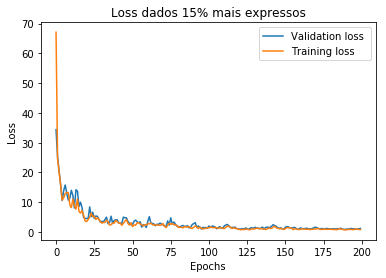

In [86]:
plt.figure(1)
plt.plot(val_loss, label ="Validation loss ")
plt.plot(loss, label ="Training loss")
plt.title('Loss dados 15% mais expressos')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

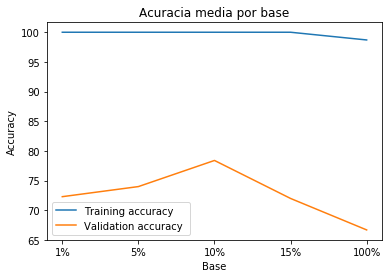

In [14]:
x = ['1%', '5%','10%','15%','100%']
y = [72.3,74.0,78.4,72,66.7]
z = [100,100,100,100,98.7]
plt.figure(1)
plt.plot(x,z , label ="Training accuracy ")
plt.plot(x,y, label ="Validation accuracy ")
plt.title('Acuracia media por base')
plt.xlabel('Base')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEWCAYAAAB8LwAVAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xd8leX5+PHPlQRIQshgJoQpIisDYliyRdDgnmhd4A+xWrXWb7V+W/sVbbVqtdpp60KtVEWts4ITVxUVEEkAEQcjC8JKwghkXL8/7ifJCZwkh0ByMq7363VeJ+dZ5zoPh3M993juW1QVY4wx5mAhwQ7AGGNM82QJwhhjjF+WIIwxxvhlCcIYY4xfliCMMcb4ZQnCGGOMX5YgTKsjIr8UkUeDHcfBRGSWiHzs83q3iBwTzJj8EZF5IvJ0sOMwwRcW7ABMyyQi7wOpQLyq7g9yODWo6l3BjiEQqhoV7BiMqYuVIMxhE5F+wARAgTMa6T3s4qUJ2Hk2dbEEYRriMmAp8ARwue8KEYkQkftFZKOIFIrIx96yySKSfdC2G0TkJO/veSLygog8LSJFwCwRGSUin4rILhHJE5G/iEh7n/2HicjbIrJDRLaIyC99jvW0z3bPi0i+F8+HIjKstg8mIu+LyG9F5BOvCug1EekiIgtEpEhEvvASZOX2g31iWCciF/is6yIir3r7fQ4MOOi9VESO9f4+VUS+9LbdLCLz6ohxsohke1Vp27zzeLHP+hgReUpECrx/h1tFJMRbN0tE/isiD4jIDqC29wkXkedEpFhEVohIqs/xbxGR77x1a0TkbJ91x4rIB9653iYizwVyrkzzZAnCNMRlwALvcbKI9PBZdx9wPHAC0Bm4GagI8LhnAi8Asd6xy4GfAV2BscBU4BoAEekEvAMsBnoCxwLv1nLcRcBAoDuwwjt2XS4ELgUScT/qnwLzvc+zFrjNi6Ej8DbwL+/YFwF/80lAfwVKgATgCu9Rmz248xoLnApcLSJn1bF9PO68JOKS9MMiMshb92cgBjgGmOQdd7bPvqOB772Y76zl+GcCz3uf+V/AyyLSzlv3Ha4EGQPcDjwtIgneut8AbwFxQC8vlkDOlWmOVNUe9gj4AYwHSoGu3uuvgZ95f4cA+4BUP/tNBrIPWrYBOMn7ex7wYT3vfQPwkvf3RcCXtWw3D3i6lnWxuKqxmFrWvw/8yuf1/cAin9enAyu9v2cCHx20/z9wCSTUO0+DfdbdBXzs81qBY2uJ40HggVrWTQbKgI4+yxYCv/bedz8w1GfdVcD73t+zgE31nOd5wFKf1yFAHjChlu1XAmd6fz8FPAz0OmibWs9VsL/T9qj9YSUIc7guB95S1W3e639RXc3UFQjHXWE2xGbfFyJynIi87lUPFeF+YLt6q3sH8j4iEioid3tVIkW4pFQZa222+Py9z8/rysblvsBorwpsl4jsAi7GXd13w3UC8f1MG+uIc7SILPGqhQqBH9cT405V3XPQsXt6+7Q/6L024koalWqc51pUbaOqFUC2d3xE5DIRWenzmZN8Yr0ZEOBzEVktIpWlprrOlWmmrIHKBExEIoALgFARyfcWdwBivTrqTFyVygDgq4N23wNE+hwrFPcj6uvgoYUfAr4ELlLVYhG5ATjPW7cZV4qoz49w1SUn4ZJDDLAT9yN2pDYDH6jqtINXeJ+vDJfIvvYW96njWP8C/gJkqGqJiDxI3QkiTkQ6+iSJPkAWsA1XcukLrPFZl+OzbyBDOPf2+SwhuOqiXBHpCzyCq+77VFXLRWQl3vlU1XzgSm+/8cA7IvIhdZwr03xZCcIcjrNw7QJDgeHeYwjwEXCZd6X5OPAHEenpXb2PFZEOwDe4hs9TvbrsW3HJpS6dgCJgt4gMBq72Wfc6EC8iN4hIBxHpJCKjaznGfmA7LkEdzS6wrwPHicilItLOe4wUkSGqWg78G5gnIpEiMpSDGvT9xLnDSw6jcImtPreLSHsRmQCcBjzvve9C4E7vnPQFbgQO976G40XkHHG9nG7AncOlQEdcgikAEJHZuBIE3uvzRaSX93Knt205dZyrw4zLNCFLEOZwXA7MV9VNqppf+cBd+V7s/Zj8HFeS+ALYAdwDhKhqIa6B+VHc1eweXLVFXX6O+6Esxl21VvWIUdViYBquTSAfWA9M8XOMp3BVLDm4K+qlDfjcfnkxTMc1aud6cdxDdeK7FlcdlY/r8TW/jsNdA9whIsXA/+F+5OuSj/sBzsU1uv9YVStLKtfhzu/3wMe40snjh/HRAF7BtRvsxDXYn6Oqpaq6Btcu8ymu6i0Z+K/PfiOBz0RkN/Aq8FNV/SGAc2WaIVG1CYOMaUlEZDKuEb5XfdsacySsBGGMMcYvSxDGGGP8siomY4wxflkJwhhjjF8t+j6Irl27ar9+/YIdhjHGtCjLly/fpqoH34d0iBadIPr168eyZcuCHYYxxrQoIlLrXf2+rIrJGGOMX5YgjDHG+GUJwhhjjF+WIIwxxvhlCcIYY4xfjZYgRORxEdkqIlk+yzp7Uw6u957jvOUiIn8SkW9FZJWIpDVWXMYYYwLTmCWIJ4BTDlp2C/Cuqg7ETQ95i7c8Azcl5EBgLm4eAGOMMUHUaPdBqOqH4jO5u+dM3HSJAE/ipnf8hbf8KXXjfiwVkVgRSVDVvMaIbfnGnXz63TaGJcaQnBhD1ygbcdgcOVVl8459ZOYU8u3W3ZRXBDoVtwkNCWHMMZ1J79eZ0JCjMZeTORqa+ka5HpU/+qqaJyLdveWJ1JwGMdtbdkiCEJG5uFIGffrUNUFX7b7YsIP73vqm6nV8dDhJiTEkJUaT7CWN7tHhDTq2aRsqKpQN2/eQlVtEVk5h1aOopKxqG7HfuYBVDgnXNaoDJw/rQUZSAmOO6UxYqDWTBlNzuZPa338lv6MIqurDuEnRSU9Pb9BIgz+eNIAfje7D6pwiVucWkun953736y1VX9RunTqQnBhDUs9okhJjSO4VQ3x0OGL/69uc8grlh227ycopqvqurMktoni/Swbtw0IYEt+J01J7et+ZGI6Lj6JDWGiQI2859uwvY8m6rSzKyuelL3NY8Nkm4iLbMW1oDzKSExg3oCvtwyxZNLWmThBbKquORCQB2Ootz8ZnDly8+W8bM5Do8HaMHdCFsQO6VC3bvb+MtXlFZGZ7V4S5hby/bisVXtLo0rF9jZLGsJ4x9IqLsKTRipSVV/BdwR6ycqovHNbkFbH3QDkAHcJCGNozmrNGJLrvQGI0x/XoRDu70j0iHTuEcVpKT05L6UlJaTkffFPAosw8FmXms3BZNp3Cw5g2pAenJMUz8bhuhLez5NsUGnW4b68N4nVVTfJe/x7Yrqp3i8gtQGdVvVlETsVNzzgDGA38SVVH1Xf89PR0beyxmPYeKGNtXnFVFUJmTiHrt+6m3MsacZHtSPKSRbKXPPp0jrSk0QKUllewfstusnKr/23X5hVRUuraDiLahTLMK0EmeVWPA7p1tGqPJrS/rJz/fruNRZn5vL12C7v2lhLZPpQTB3cnIymBKYO7Edm+uVSEtBwislxV0+vdrrEShIg8g2uQ7oqbu/Y24GXcXLt9gE3A+aq6Q9yv6V9wvZ72ArNVtd5f/qZIEP6UlJbzdX4xmTmFrPZ+WL7ZUkxpuTuXncLDSOrpqqWSvGqqfl06EmKNb0FzoKyCb7YUV5UKsnIKWZtfzIEylwyiOoQxtGe09+/mSoj9u0ZZg2kzUlpewdLvt7MoK583s/LZvucA4e1CmHRcN2YkJ3Di4O50Cm8X7DBbhKAniKYQrAThz/6ycr7J3+1+gLwr0q/zijlQXvMHKNmnisp+gBpHSWk56yoTuNfGtC7ffwIf5v2bWAJvWcorlC827GBRZh6LV+ezpWg/7UNDmDCwK6ckxTNtaA9iI9sHO8xmyxJEM1Ba7q5aV1c2bua6xs393lVrZPtQhiZYFcaR2HegnLX5RT5VgEWs31JMmVcFGBPRzkvK1YnZqgBbl4oK5cvNO1mUmc+irHxydu0jLEQYO6ALGUkJTB/Ww7qyH8QSRDNVVl7BtwWuR0zlj9rq3CL2lbpG0PB2IQxJiK7qDZOUGMPAHlHWCIrr6bI2zyVbV71XxLcF1e1Bnb1OBMmJ0VXnzjoRtC2qSmZOIYuy8lmUmceG7XsJERjVvzMzkhM4eVg8PawLuyWIlqSyG2VmTiGZ2UVVJY3dB3Wj9C1pDOzRurtRFpeUsia3ultpVm4R3xXsrtFfPrmyN5l3ThJirBuyqaaqfJ1f7HpDZeWzfutuROD4PnGckhRPRnICibERwQ4zKCxBtHCVN2JleiWMzGxXRVXs3YjVLlQYFN+p6ko5KTGGwfGdWmT3v8J9paz2quAyc4pYnVPI99v2VK13NzJ6VXFe24FdBZrD9e3WYhZl5vNGVj5r84oASO0VQ0ZyAhlJ8fTt0jHIETYdSxCtkKqyacde76q6qKprZuG+UgDCQoSBPTqR1DPaa4CNYWhCNBHtm0/S2LnngNeIX1R1r8nG7Xur1ifGRlQ1HCf1cgmhWyerPzZH14Zte1i82lVDfZVdCMCQhGhmJMWTkRzPsd07BTnCxmUJoo1QVbJ37qv6sc30fnh37DkAQIjAsd2jqqqmkhJd0ujYofH7jm/fvb9GCSgzp5CcXfuq1vfuHFF1w6F7jqaLNSaaJpa9cy+Ls/JZnJXPso07ARjYPYoMrxpqcHynVld1aQmiDVNV8gpLatzcl5lTxLbd+wE3RtAxXTv69O5xP85H0od8a7F7v8o2lKycQvIKS6rW9+sSWaMNZVjPaOuGaJqdLUUlvLk6nzcy8/j8hx1UqPvunpKUwIzkeJITY1pFsrAEYQ6xpajEZwgJV9LIL6r+Ee/ftWPVjX2Vjb8xETWThqqypWi/T08i97y1uDr59K9MPl77yNCe0Yccx5jmbtvu/by1eguLsvL49LvtlFUoibERXskinhG941rsvTOWIExACor3uyv+7MKqtgHfaqA+nSNJTowhMS6Cb7a4IUe27a6uvhrQLapGT6KhPaOJaoLqK2Oa0q69B3h7zRYWZ+Xz0fptHCivoEd0B04Z5qqhRrawYcotQZgG27HnQFWbRmWJI29XSVVbRmUj+JCEaBsHx7Q5RSWlLPl6K29k5vH+ugL2l1XQNao904bGMyM5njHHdGn29y1ZgjBHVUWFttjitDGNZc/+Mt5fV8CirDze+3orew+UExvZjmlDepCRHM+4Y7s2y/uVLEEYY0wTKikt58NvClic5UaeLS4po1OHMKYO6U5GcgKTmtEw5YEmCKsfMMaYoyC8XSjTh8UzfVg8B8oq+O9321iUmcdba7bw8spcItuHMmVQdzKS45kyqHuTdDU/UlaCMMaYRlRaXsFn3+9gUVYeb67OZ9vuA3QIc8OUZyTHM3VID6KbeJhyq2IyxphmprxCWbZhB4u8G/Pyi0poFyqMP7YrGUkJTBvag7iOjX9/kCUIY4xpxtww5btYnOUGE8zeuY/QEGHsMV3ISI5n+tD4RhtmxhKEMca0EKpKVk4Ri7xk8cO2PYQIjOzXmYykeE5JSiA+5ugNUGkJwhhjWiBVZd2WYt7IzGdxVh7fbNkNQFqf2Ko5LXp3jjyi97AEYYwxrcC3W3ezOCuPNzLzWeMNU56cGMPPpg3kxME9GnRM6+ZqjDGtwLHdo7j2xIFce+JANm7fw+IsN6dFU7AShDHGtDGBliCa94AhxhhjgsYShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL+CkiBE5KcikiUiq0XkBm/ZPBHJEZGV3mNGMGIzxhjjNPlQGyKSBFwJjAIOAItF5D/e6gdU9b6mjskYY8yhgjEW0xBgqaruBRCRD4CzgxCHMcaYOgSjiikLmCgiXUQkEpgB9PbWXSsiq0TkcRGJ87eziMwVkWUisqygoKCpYjbGmDanyROEqq4F7gHeBhYDXwFlwEPAAGA4kAfcX8v+D6tquqqmd+vWrWmCNsaYNigojdSq+piqpqnqRGAHsF5Vt6hquapWAI/g2iiMMcYESbB6MXX3nvsA5wDPiEiCzyZn46qijDHGBEmwJgx6UUS6AKXAT1R1p4j8U0SGAwpsAK4KUmzGGGMIUoJQ1Ql+ll0ajFiMMcb4Z3dSG2OM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/gpIgROSnIpIlIqtF5AZvWWcReVtE1nvPccGIzRhjjNPkCUJEkoArgVFAKnCaiAwEbgHeVdWBwLvea2OMMUESjBLEEGCpqu5V1TLgA+Bs4EzgSW+bJ4GzghCbMcYYTzASRBYwUUS6iEgkMAPoDfRQ1TwA77m7v51FZK6ILBORZQUFBU0WtDHGtDVNniBUdS1wD/A2sBj4Cig7jP0fVtV0VU3v1q1bI0VpjDEmKI3UqvqYqqap6kRgB7Ae2CIiCQDe89ZgxGaMMcYJVi+m7t5zH+Ac4BngVeByb5PLgVeCEZsxxhin3gQhItc2QpfTF0VkDfAa8BNV3QncDUwTkfXANO+1McaYIAkLYJt44AsRWQE8Drypqnokb6qqE/ws2w5MPZLjGmOMOXrqLUGo6q3AQOAxYBawXkTuEpEBjRybMcaYIAqoDcIrMeR7jzIgDnhBRO5txNiMMcYEUb1VTCJyPa7ReBvwKHCTqpaKSAiu99HNjRuiMcaf0tJSsrOzKSkpCXYoppkKDw+nV69etGvXrkH7B9IG0RU4R1U3+i5U1QoROa1B72qMOWLZ2dl06tSJfv36ISLBDsc0M6rK9u3byc7Opn///g06RiBVTG/g7lUAQEQ6ichoL4C1DXpXY8wRKykpoUuXLpYcjF8iQpcuXY6ohBlIgngI2O3zeo+3zBgTZJYcTF2O9PsRSIIQ326tqlpBYFVTxphWbPv27QwfPpzhw4cTHx9PYmJi1esDBw4EdIzZs2ezbt26Orf561//yoIFC45GyOYwBfJD/73XUF1ZargG+L7xQjLGtARdunRh5cqVAMybN4+oqCh+/vOf19hGVVFVQkL8X4vOnz+/3vf5yU9+cuTBNrGysjLCwlr+dXQgJYgfAycAOUA2MBqY25hBGWNarm+//ZakpCR+/OMfk5aWRl5eHnPnziU9PZ1hw4Zxxx13VG07fvx4Vq5cSVlZGbGxsdxyyy2kpqYyduxYtm51w7HdeuutPPjgg1Xb33LLLYwaNYpBgwbxySefALBnzx7OPfdcUlNTueiii0hPT69KXr5uu+02Ro4cWRVfZeXIN998w4knnkhqaippaWls2LABgLvuuovk5GRSU1P51a9+VSNmgPz8fI499lgAHn30US688EJOO+00MjIyKCoq4sQTTyQtLY2UlBRef/31qjjmz59PSkoKqampzJ49m127dnHMMcdQVubGLd21axf9+/envLz8qP27NES9KU5VtwIXNkEsxpgGuv211azJLTqqxxzaM5rbTh/WoH3XrFnD/Pnz+fvf/w7A3XffTefOnSkrK2PKlCmcd955DB06tMY+hYWFTJo0ibvvvpsbb7yRxx9/nFtuOXTeMFXl888/59VXX+WOO+5g8eLF/PnPfyY+Pp4XX3yRr776irS0NL9x/fSnP+X2229HVfnRj37E4sWLycjI4KKLLmLevHmcfvrplJSUUFFRwWuvvcaiRYv4/PPPiYiIYMeOHX6P6evTTz9l5cqVxMXFUVpayiuvvEKnTp3YunUr48aN47TTTuOrr77innvu4ZNPPqFz587s2LGD2NhYxo0bx+LFiznttNP417/+xQUXXEBoaGgDzv7RE8hYTOEi8hMR+ZuIPF75aIrgjDEt04ABAxg5cmTV62eeeYa0tDTS0tJYu3Yta9asOWSfiIgIMjIyADj++OOrruIPds455xyyzccff8yFF7rr2NTUVIYN85/Y3n33XUaNGkVqaioffPABq1evZufOnWzbto3TTz8dcPcOREZG8s4773DFFVcQEREBQOfOnev93NOnTycuzg1dp6r84he/ICUlhenTp7N582a2bdvGe++9x8yZM6uOV/k8Z86cqiq3+fPnM3v27Hrfr7EFUkn2T+Br4GTgDuBiwLq3GtOMNPRKv7F07Nix6u/169fzxz/+kc8//5zY2FguueQSv10v27dvX/V3aGhoVXXLwTp06HDINoEMD7d3716uvfZaVqxYQWJiIrfeemtVHP56+6iq3+VhYWFUVFQAHPI5fD/3U089RWFhIStWrCAsLIxevXpRUlJS63EnTZrEtddey5IlS2jXrh2DBw+u9zM1tkDaII5V1V8De1T1SeBUILlxwzLGtBZFRUV06tSJ6Oho8vLyePPNN4/6e4wfP56FCxcCkJmZ6beEsm/fPkJCQujatSvFxcW8+OKLAMTFxdG1a1dee+01wP3o7927l+nTp/PYY4+xb98+gKoqpn79+rF8+XIAXnjhhVpjKiwspHv37oSFhfH222+Tk5MDwEknncSzzz5bdTzfqqtLLrmEiy++uFmUHiCwBFHqPe8SkSQgBujXaBEZY1qVtLQ0hg4dSlJSEldeeSXjxo076u9x3XXXkZOTQ0pKCvfffz9JSUnExMTU2KZLly5cfvnlJCUlcfbZZzN69OiqdQsWLOD+++8nJSWF8ePHU1BQwGmnncYpp5xCeno6w4cP54EHHgDgpptu4o9//CMnnHACO3furDWmSy+9lE8++YT09HSef/55Bg4cCEBKSgo333wzEydOZPjw4dx0001V+1x88cUUFhYyc+bMo3l6GkzqK5qJyBzgRVyp4QkgCvi1qv6j0aOrR3p6ui5btizYYRgTFGvXrmXIkCHBDqNZKCsro6ysjPDwcNavX8/06dNZv359i+tq+uyzz/Lmm28G1P03UP6+JyKyXFXT69u3zrPnDchX5E3o8yFwzJEEaowxjWH37t1MnTqVsrIyVJV//OMfLS45XH311bzzzjssXrw42KFUqfMMegPyXQssbKJ4jDHmsMXGxla1C7RUDz3U/EYwCqQN4m0R+bmI9BaRzpWPRo/MGGNMUAVSBrvCe/a9312x6iZjjGnVArmTumEDiRtjjGnRAplR7jJ/y1X1qaMfjjHGmOYikDaIkT6PCcA84IxGjMkY0wJMnjz5kJveHnzwQa655po694uKigIgNzeX8847r9Zj19eF/cEHH2Tv3r1Vr2fMmMGuXbsCCd0EqN4EoarX+TyuBEYA7evbzxjTul100UU8++yzNZY9++yzXHTRRQHt37NnzzrvRK7PwQnijTfeIDY2tsHHa2qqWjVkR3MVSAniYHuBgUc7EGNMy3Leeefx+uuvs3//fgA2bNhAbm4u48ePr7ovIS0tjeTkZF555ZVD9t+wYQNJSUmAGwbjwgsvJCUlhZkzZ1YNbwHu/oDKocJvu+02AP70pz+Rm5vLlClTmDJlCuCGwNi2bRsAf/jDH0hKSiIpKalqqPANGzYwZMgQrrzySoYNG8b06dNrvE+l1157jdGjRzNixAhOOukktmzZArh7LWbPnk1ycjIpKSlVQ3UsXryYtLQ0UlNTmTp1KuDmx7jvvvuqjpmUlMSGDRuqYrjmmmtIS0tj8+bNfj8fwBdffMEJJ5xAamoqo0aNori4mAkTJtQYxnzcuHGsWrXqsP7dDkcgbRCv4XotgUsoQ7H7IoxpXhbdAvmZR/eY8cmQcXetq7t06cKoUaNYvHgxZ555Js8++ywzZ85ERAgPD+ell14iOjqabdu2MWbMGM4444xap8B86KGHiIyMZNWqVaxatarGcN133nknnTt3pry8nKlTp7Jq1Squv/56/vCHP7BkyRK6du1a41jLly9n/vz5fPbZZ6gqo0ePZtKkScTFxbF+/XqeeeYZHnnkES644AJefPFFLrnkkhr7jx8/nqVLlyIiPProo9x7773cf//9/OY3vyEmJobMTHeed+7cSUFBAVdeeSUffvgh/fv3D2hI8HXr1jF//nz+9re/1fr5Bg8ezMyZM3nuuecYOXIkRUVFREREMGfOHJ544gkefPBBvvnmG/bv309KSkq979lQgZQg7gPu9x6/Ayaq6qGDtBtj2hzfaibf6iVV5Ze//CUpKSmcdNJJ5OTkVF2J+/Phhx9W/VCnpKTU+NFbuHAhaWlpjBgxgtWrV/sdiM/Xxx9/zNlnn03Hjh2JiorinHPO4aOPPgKgf//+DB8+HKh9SPHs7GxOPvlkkpOT+f3vf8/q1asBeOedd2rMbhcXF8fSpUuZOHEi/fu7zp6BDAnet29fxowZU+fnW7duHQkJCVVDpkdHRxMWFsb555/P66+/TmlpKY8//jizZs2q9/2ORCD3QWwC8lS1BEBEIkSkn6puaNTIjDGBq+NKvzGdddZZ3HjjjaxYsYJ9+/ZVXfkvWLCAgoICli9fTrt27ejXr5/fIb59+Std/PDDD9x333188cUXxMXFMWvWrHqPU9f4cpVDhYMbLtxfFdN1113HjTfeyBlnnMH777/PvHnzqo57cIyBDAkONYcF9x0SvLbPV9txIyMjmTZtGq+88goLFy6styH/SAVSgnge8G1JKfeWGWPauKioKCZPnswVV1xRo3G6cqjrdu3asWTJEjZu3FjncSZOnMiCBQsAyMrKqqpXLyoqomPHjsTExLBlyxYWLVpUtU+nTp0oLi72e6yXX36ZvXv3smfPHl566SUmTJgQ8GcqLCwkMTERgCeffLJq+fTp0/nLX/5S9Xrnzp2MHTuWDz74gB9++AGoOST4ihUrAFixYkXV+oPV9vkGDx5Mbm4uX3zxBQDFxcVVc1/MmTOH66+/npEjRwZUYjkSgSSIMFU9UPnC+9t6MRljAFfN9NVXX1XN6AZu2Oply5aRnp7OggUL6p385uqrr2b37t2kpKRw7733MmrUKMDNDjdixAgkD2JZAAAXcElEQVSGDRvGFVdcUWOo8Llz55KRkVHVSF0pLS2NWbNmMWrUKEaPHs2cOXMYMWJEwJ9n3rx5nH/++UyYMKFG+8att97Kzp07SUpKIjU1lSVLltCtWzcefvhhzjnnHFJTU6uG6T733HPZsWMHw4cP56GHHuK4447z+161fb727dvz3HPPcd1115Gamsq0adOqSiHHH3880dHRTTJnRCDDfb8N/FlVX/Venwlcr6pTG/ymIj8D5uAavzOB2cDfgUlAobfZLFU9dNZxHzbct2nLbLjvtik3N5fJkyfz9ddfExJS/zX+kQz3HUgJ4sfAL0Vkk4hsAn4BXBXAfn6JSCJwPZCuqklAKFB56XGTqg73HnUmB2OMaWueeuopRo8ezZ133hlQcjhSgYzF9B0wRkSicCWOQyv9Gva+ESJSCkQCuUfhmMYY06pddtllXHaZ39GPGkW9KUhE7hKRWFXdrarFIhInIr9t6Buqag6u6+wmIA8oVNW3vNV3isgqEXlARDr4219E5orIMhFZVlBQ0NAwjDHG1COQMkqGqlYNcOLNLjejoW8oInHAmUB/oCfQUUQuAf4XGIwb86kzrirrEKr6sKqmq2p6t27dGhqGMa1CfW2Ipm070u9HIAki1PdqXkQiAL9X9wE6CfhBVQtUtRT4N3CCquapsx+YD4w6gvcwptULDw9n+/btliSMX6rK9u3bCQ8Pb/AxArlR7mngXRGpnEV7NvBkHdvXZxOuTSMS2AdMBZaJSIKq5om7O+QsIOsI3sOYVq9Xr15kZ2djVa2mNuHh4fTq1avB+wfSSH2viKzCXfkLsBjo29A3VNXPROQFYAVQBnwJPAwsEpFu3nusxPWeMsbUol27dlVDPBjTGAIpQQDk4+6mvgD4AXjxSN5UVW8Dbjto8YlHckxjjDFHV60JQkSOw92fcBGwHXgO1811Sm37GGOMaT3qKkF8DXwEnK6q30LVHdDGGGPagLp6MZ2Lq1paIiKPiMhUXPuAMcaYNqDWBKGqL6nqTNy9Ce8DPwN6iMhDIjK9ieIzxhgTJIHMSb1HVReo6mlAL1wPI5swyBhjWrnDGu1JVXeo6j9U1XocGWNMK9f4wwEaY4xpkSxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOM8csShDHGGL8sQRhjjPHLEoQxxhi/LEEYY4zxyxKEMcYYvyxBGGOCRxW2roWV/4K9O4IdjTlIXVOOGmPM0VdeBps+hXVvuMfODW55bB+44CnoOSKo4ZlqliCMMY2vpAi+exe+fgPWvwUluyC0AxwzCcbdADG94bWfwmPTIeNeOH4WiM1wHGyWIIwxjaMwG9Ytco8fPoSKUojoDINmwOAZcMwU6BBVvf1VH8K/58DrN8Dmz+HU+6F9ZPDiN5YgjDFHiSrkZ1ZXHeV95ZZ3HgBjfuwSQ+/REBLqf/+OXeDiF+CDe+GDeyB/laty6jKg6T6DqcEShDGm4coOwMaPXdXRukVQlA0I9B4FJ93ukkK34wI/XkgoTPlf6DXSlSYengxn/hWGntFYn8DUwRKEMebw7NsJ69+Bdf+Bb9+F/UUQFgEDTnQ/7gNPhqhuR/YeA09yVU4LL4eFl8LYa+GkeRDa7mh8AhMgSxDGmPrt3OC1J7wBGz+BijLo2B2GneVKCcdMhnYRR/c9Y/vAFYvhzV/Cp3+BnBVw/nzoFH9038fUyhKEMeZQFRWQ92V11dHW1W55t8FwwvUuKSQeDyGNfCtVWAfXWN17DLx2Pfx9Apz3OPSf0Ljva4AgJQgR+RkwB1AgE5gNJADPAp2BFcClqnogGPEZ0yaVlrjeRuv+A+sWw+58kBDocwKcfBccd0rwGoxTzof4JHjuUnjqDJj6f657rHWFbVRNniBEJBG4HhiqqvtEZCFwITADeEBVnxWRvwP/D3ioqeMzpk3Zsx3Wv+mqjr59D0r3QPsoOHYqDDoVBk6DyM7BjtLpPgTmLoFXroV35sHmL+Csv0FEbLAja7WCVcUUBkSISCkQCeQBJwI/8tY/CczDEoQxR9/27+Dr/7iqo81LQSugU09IvdBVHfWf4Kp2mqMOneD8J+Czv8Nbt7peThc8BQkpwY6sVWryBKGqOSJyH7AJ2Ae8BSwHdqlqmbdZNpDY1LEZ0ypVlEP2Mq/qaBFs+8Yt75EME2+CQRmQMLzlVNeIwJiroWcaPH85PDYNZtwHaZcGO7JWJxhVTHHAmUB/YBfwPJDhZ1OtZf+5wFyAPn36NFKUxrRwB/bC90u8m9YWw95tEBIG/cbDyCth0Cmul1BL1mc0XPURvHgFvHqtKw3NuO/o96Zqw4JRxXQS8IOqFgCIyL+BE4BYEQnzShG9gFx/O6vqw8DDAOnp6X6TiDFtUvEW+GaxKyV8vwTKSqBDjGtHGJThnsNjgh3l0RXVDS59GZbcBR/d5+7evuCf0Ll/sCNrFYKRIDYBY0QkElfFNBVYBiwBzsP1ZLoceCUIsRnTcqhCwbrqqqPsZYBCTB832N2gDOg7rvXfXBYSClN/7e7e/vdc+MckOPvvbrwnc0REtekvwkXkdmAmUAZ8ievymkh1N9cvgUtUdX9dx0lPT9dly5Y1crTGNCPlZa4q5evKobJ/cMt7jnANzINmQI9hLac94WjbuQEWXuZKEuN/BlNuhVC73etgIrJcVdPr3S4YCeJosQRh2oT9xW5Ii3WLXJfUfTshtD30n+RKCYMyILpnsKNsPkpLYPEvYPkT0M+7sS6qe7CjalYCTRCWWo1pjopyvQZmb6js8gMQEeduVhuU4cY96tAp2FE2T+3C4fQ/uruvX/+Zu/v6/Ceg79hgR9biWIIwpjlQhS1Z1VVHeSvd8rj+MGpu9VDZVl0SuOEXQXyyG+zviVNh2h0w9idtt/qtAezbZkywlB2Ajf+tnlSncBMgbqjrqbfB4FOh63H2g3Yk4pNg7vvw8jXw1q9g82du+PDw6GBH1iJYgjCmKe3bBd++40oJ69+B/YXeUNlTYNJNrgrJ6suPrvAYmPm0GxH27dtgy2qY+U/XmG/qZAnCmMa2c6PPUNn/9YbK7uYmwakcKtum1mxcInDCdW4E2udnwyNT4fQH3fAiplaWIIw52irKXRtCZdXRliy3vOsgN/HN4FO9obJrmXrTNJ6+J7iJiF64Al66CjYthVPudg3b5hCWIIw5UqUlkLMcNn3qHps/d7OsSQj0GQvTf+tKCja3cvPQqQdc9gq89xv474OQ+6Ub8C+ub7Aja3YsQRhzuPbtco2dGz9xV6C5K1w3VIBuQyDpXHelOmAqdOwS3FiNf6FhMO12d/f1S1fDPybCOY/AcdODHVmzYgnCmPoU5lSXDjZ+ClvXAOoGv+s5AkZf5SbV6TOm+cydYAIz+FS46n147jL41/ludNvJ/2vVfx5LEMb4UnXDYVeWDjZ9Ars2uXXto1wX1GFnuWSQmG6Ny61B52Ngztvwxs/hw99D9hdw7mPQsWuwIws6SxCmbSsvhbxVLhFs9EoJ+3a4dZFd3d23o692zz2S7Ua11qpdhLs/ovdo+M/P3d3XFzzpqqDaMPu2m7Zl/27IWeYlg0/cCKile926uP7uPoS+Y12VUZcBdpNaW5N2GSSkugH/5mfA9DtdFWIb/R5YgjCt255tXvvBUldtlPcVaDkg7i7bEZe66qI+YyE6IdjRmuYgIRXmfgAvX+0G/du8FM74c5sc+8oShGk9VGHXxurSwaal1dNrhnZw9x6Mv8GVDnqPbH2T55ijJyIWZi6AT/4I797h7r6+4J/QfXCwI2tSbTNBfPEYfPyg6/cc2/eg5z4QFQ8hIcGO0tSnosL1KNr0aXWjcrE3EWF4jBvNM/Ui1+W05wgI6xDceE3LEhLi5pRIPN7dWPfIiXDGnyD5vGBH1mTaZoKI7euqFXZtdOPi7M6vuT60A8T29pM8vEdk5zZbJxlUZfshZ0V1l9NNn7mxjAA69fTaDrxH96GW5M3R0X+im/v6hdnw4v9zFyIn39kmLjhswiCA0n2wa7NLGDs3uOddm9wYOrs2uglafLXv5EoatZVA2mBdZaMoKXR3JVeWDnKWQ7k3yWDX41wi6OvdfxDb15K2aVzlpfDOPDfoX+LxcP6T7kKyBbIZ5Y6mkiIveWz0ed5U/XfpnprbR3SuJXn0hZjeNu5LbYrzvWTg3ZC2JQtQkFDoOby6dNBnjPVRN8Gz5hV4+Sduru9zH4VjpwY7osNmCaKpqMLe7V7S2FCdRCpLIIWbq4dhqNQpoZbqqz4Qndg2+tqrwvZvq5PBpk9c6Q2gXaS7Ia2ydNBrJLTvGNRwjalh27euK+zWNTD5Fph4c4uq0rQE0VxUVEBxXu0lkKIc0Irq7UPCXJKokTz6VVdpRfVomVUp5WWQv8qn/WAp7Clw6yK7VJcO+o6F+BR3dWZMc3ZgL/znRvjqGTfu1jmPtJixtyxBtBRlB6Ao+6Dk4VMC2bO15vZh4S5Z+Gv7iO3r5i1uDgnkwN6aN6Rt/qK6Ki62b3Uy6HMCdB3YPGI25nCpwvInYNHN7uLt/Ceh1/HBjqpeliBaiwN7a7Z3VDWke8tKCmtu3yG69uQR17fxqmr27qg5oF3eSjcxDuJm7qpsO+h7AkT3bJwYjAmWnBWw8HJXW3DK72DknGZ90WMJoq3Yt8tP9ZVPCaRsX83tI7v6b/uI6+ca0MPaB/a+uzbVvCGt4Gu3PLQ99EyrLh30HuVuOjKmtdu7w01CtP4tSL7AzVjXTNvOLEEYV/zdU3BQycOnDaRws3eVX0nc1b2/Ekj7KJ8qo6WuWgxciaX3qOoupz3TrJeWabsqKuDj++G9O6HbIHf3dbfjgh3VISxBmPpVlENRbu0lkKJc4KDvR1R8zRvSegyzsfONOdh3S9xNdWX74cy/wLCzgx1RDZYgzJEr2w+F2a7kUbLLDVcR179Z160a02wU5sDzsyD7cxhzDUy7o9n0zgs0QbSBDvemwcI6uCGvbS5lYw5fTCLM+g+8/X+w9G9uJIDz5rvlLUTLubPDGGNamrD2kHG3SwxbVru5r79/P9hRBcwShDHGNLakc+DKJW6ImH+e7aY2raiof78ga/IEISKDRGSlz6NIRG4QkXkikuOzfEZTx2aMMY2m23Ew510Ydg6891t45sJDBwJtZpo8QajqOlUdrqrDgeOBvcBL3uoHKtep6htNHZsxxjSqDlFugL8Z98F377kqp9wvgx1VrYJdxTQV+E5VNwY5DmOMaRoiMOpKuGKxq2Z67GRYNt/dt9TMBDtBXAg84/P6WhFZJSKPi0icvx1EZK6ILBORZQUFBU0TpTHGHG290uGqD6HfOHj9Bnj5Gje0TjMStPsgRKQ9kAsMU9UtItID2Ia7M+s3QIKqXlHXMew+CGNMi1dRDh/cCx/c4248veCpRu9aHuh9EMEsQWQAK1R1C4CqblHVclWtAB4BRgUxNmOMaRohoTDlf+GSF9zw/w9PhrWvBTsqILgJ4iJ8qpdEJMFn3dlAVpNHZIwxwXLsSW7u664D4blL4K1b3TSnQRSUBCEikcA04N8+i+8VkUwRWQVMAX4WjNiMMSZoYnvD7EVuuPBP/gxPnuGm4g0SG4vJGGOao1XPw2vXu5GUz58P/cYftUO3hDYIY4wxtUk5H658D8JjXEni4webvCusJQhjjGmuug+BuUtg6Bnwzm3w7MVukrAmYgnCGGOasw6d3GB/p9wN6990vZzyVjXJW1uCMMaY5k4ExlwNs95w87Q8Ng1Wv1T/fkfIEoQxxrQUfUa7u6+PmQydG3+eFpswyBhjWpKobvCj55rkrawEYYwxxi9LEMYYY/yyBGGMMcYvSxDGGGP8sgRhjDHGL0sQxhhj/LIEYYwxxi9LEMYYY/xq0cN9i0gBsLGBu3fFTXFqAmPn6/DY+Tp8ds4Oz5Gcr76q2q2+jVp0gjgSIrIskPHQjWPn6/DY+Tp8ds4OT1OcL6tiMsYY45clCGOMMX615QTxcLADaGHsfB0eO1+Hz87Z4Wn089Vm2yCMMcbUrS2XIIwxxtTBEoQxxhi/Wn2CEJHHRWSriGT5LLtHRFaJyFM+yy4VkZ8GJ8rmQ0Q2iEimiKwUkWXeMjtfPmr5TnUWkbdFZL33HOctP1dEVovIRyLSxVs2QESeDVb8Ta2W8zVPRHK879lKEZnhLR/nfde+EJFjvWWxIvKmiEiwPkNjO8zvlIjIn0TkW+9cpXnLB4nIchH5SkTGesvCROQdEYlsSFytPkEATwCnVL4QkRjgBFVNAUJFJFlEIoBZwN+CEmHzM0VVh6tqup0vv57A5zvluQV4V1UHAu96rwH+BxgDPAX8yFv2W+DXjR9ms/EEh54vgAe879lwVX3DW/Y/wLnAL4GrvWW/Bu7S1t1g+gSBf6cygIHeYy7wkLf8Km+b84Cfe8uuBv6pqnsbElSrTxCq+iGww2dRBdDeuxqJAEqBm4A/qWppEEJs7ux8HcTPdwrgTOBJ7+8ngbO8vyuADkAkUCoiE4A8VV3fFLE2B7Wcr9qU4r5nledrAJCoqh80VnzNwWF+p84EnlJnKRArIgkceu5igdNxFycN0ubmpFbVYhF5EfgSl5ULgZGqekdwI2s2FHhLRBT4h6o+bOcrID1UNQ9AVfNEpLu3/HbgTSAXuARYCFwYnBCbnWtF5DJgGfA/qroT+B2u++Y+4FLgPtpWactXbd+pRGCzz3bZ3rK/4pJBB1xp4v+AO4+k5NXqSxD+qOq9XrH2f4DfAP8nInNEZKGI3Brs+IJsnKqm4YqxPxGRiXa+Gk5V31bV41X1dNwV4BvAIBF5QUQeaWjdcCvwEDAAGA7kAfcDqOpKVR2jqlOAY3CJVUTkORF5WkR6BC3i5sNfW4yq6iZVnayqY4G9QE/gaxH5p3f+jjvcN2qTCaKSiIzw/vwGuExVLwCSRGRgEMMKKlXN9Z63Ai8BoyrX2fmq0xavmI/3vNV3pZcILse12/wOuAJYDlzcxHE2C6q6RVXLVbUCeASf7xm4jADcirsguc17PA1c39SxBlFt36lsoLfPdr1widTXnbiS1/XAAqrP4WFp0wkC72oYaAeEessqcHV4bY6IdBSRTpV/A9OBLJ9N7HzV7lVcAsB7fuWg9TcDf/TabSJwVXlt9txV/vB5zqbm9wzcOfyPV+0UiTtXbe181fadehW4zOvNNAYorKyKAhCRSUCO185Vee7Kaci5U9VW/QCewRVhS3GZ9/95y88CbvPZ7j4gE1gQ7JiDeK6OAb7yHquBX/mss/NV/dkP+U4BXXBtNOu9584+2/cEXvd5fb53fv8LdAv25wnS+fqn9/1Z5f3gJfhsHwksAdp5ryd42y4Hjgv25wn2dwpXxfRX4DvvvKT7HEeAt4E47/UQYIV3nscdblw21IYxxhi/2noVkzHGmFpYgjDGGOOXJQhjjDF+WYIwxhjjlyUIY4wxflmCMCZAIlLujTz6lYisEJETgh2TMY3JurkaEyAR2a2qUd7fJwO/VNVJQQ7LmEZjJQhjGiYa2AkgIlEi8q5XqsgUkTO95R1F5D9eiSNLRGZ6y48XkQ+8sfvfPOiuYmOaDStBGBMgESnH3bkaDiQAJ6rqchEJAyJVtUhEugJLcWP1nwOcoqpXevvH4AZR+wA4U1ULvKRxsqpeEYSPZEydLEEYE6CDqpjGAo8CSbhh8x8AJuLGvRkE9MeVMt7EDfH9uqp+JCJJwCfA995hQ3HzQ0xvys9iTCDa3HwQxhwNqvqpV1roBszwno9X1VIR2QCEq+o3InK8t/53IvIWboTc1eqGZDamWbM2CGMaQEQG467+twMxwFYvOUwB+nrb9AT2qurTuMEN04B1QDefOYPbiciwYHwGY+pjJQhjAhchIiu9vwW4XFXLRWQB8JqILANWAl972yQDvxeRCtwonVer6gEROQ/4k9cmEQY8iBvd1ZhmxdogjDHG+GVVTMYYY/yyBGGMMcYvSxDGGGP8sgRhjDHGL0sQxhhj/LIEYYwxxi9LEMYYY/z6/xsBVW3nBuz5AAAAAElFTkSuQmCC

SyntaxError: invalid syntax (<ipython-input-8-d1ef20a8546b>, line 1)